In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp

In [2]:
#importamos los archivos csv que vamos a utilizar de la Base de datos extraida de OIV en español para el análisis exploratorio de datos de los años 2013-2023
dfvino = pd.read_csv(r"c:\Users\usuari\Desktop\Proyecto_final\data\dfvino_unido.csv")

#### Visión general de los datos

In [3]:
# Muestra la cantidad de filas y columnas del archivo
dfvino.shape    

(8234, 7)

In [4]:
# Muestra los primeros 5 registros del archivo
dfvino.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afganistán,Vino,Consumo,2013,1000 hl,1.0
1,Asia,Afganistán,Vino,Importaciones,2013,1000 hl,0.0
2,Asia,Afganistán,Vino,Producción,2013,1000 hl,0.0
3,Asia,Afganistán,Vino,Consumo,2014,1000 hl,1.0
4,Asia,Afganistán,Vino,Importaciones,2014,1000 hl,1.0


In [5]:
# Que informacion tiene cada columna del dfvino
print(dfvino['Variable'].unique())
print(dfvino['Product'].unique())
print(dfvino['Unit'].unique())

['Consumo' 'Importaciones' 'Producción' 'Exportaciones']
['Vino']
['1000\xa0hl']


In [6]:
# Muestra estructura del dfvino
dfvino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       8234 non-null   object 
 1   Region/Country  8234 non-null   object 
 2   Product         8234 non-null   object 
 3   Variable        8234 non-null   object 
 4   Year            8234 non-null   int64  
 5   Unit            8234 non-null   object 
 6   Quantity        8234 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 450.4+ KB


In [7]:
# Muestra los tipos de datos numéricos
dfvino.describe()

,Year,Quantity
count,8234.000000,8234.000000
mean,2017.863614,953.139786
std,3.094327,4030.507685
min,2013.000000,0.000000
25%,2015.000000,0.000000
50%,2018.000000,13.000000
75%,2021.000000,162.000000
max,2023.000000,54783.000000


In [8]:
# Muestra el tipo de variable de cada columna
dfvino.dtypes

Continent          object
Region/Country     object
Product            object
Variable           object
Year                int64
Unit               object
Quantity          float64
dtype: object

In [9]:
# Muestra los valores únicos de la columna 'Region/Country'
dfvino['Region/Country'].unique()

array(['Afganistán', 'Albania', 'Alemania', 'American Samoa', 'Andorra',
       'Angola', 'Antigua y Barbuda', 'Antillas Neerlandesas',
       'Arabia Saudí', 'Argelia', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bangladés',
       'Barbados', 'Baréin', 'Bélgica', 'Belgium and Luxemburg', 'Belice',
       'Benín', 'Bermuda', 'Bielorrusia', 'Bolivia',
       'Bosnia y Herzegovina', 'Botsuana', 'Brasil', 'Brunéi', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Bután', 'Cabo Verde', 'Camboya',
       'Camerún', 'Canadá', 'Cayman Islands', 'Chad', 'Chile', 'Chipre',
       'Colombia', 'Comoras', 'Congo', 'Cook Islands', 'Corea del Norte',
       'Corea del Sur', 'Costa de Marfil', 'Costa Rica', 'Croacia',
       'Cuba', 'Dinamarca', 'Dominica', 'Ecuador', 'Egipto',
       'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia',
       'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Esuatini',
       'Etiopía', 'Faroe Islands', 'F

In [10]:
# Comprobación de nulos
dfvino.isnull().sum()

Continent         0
Region/Country    0
Product           0
Variable          0
Year              0
Unit              0
Quantity          0
dtype: int64

In [11]:
# Comprobación de duplicados
dfvino.duplicated().sum()

np.int64(0)

### Correcciones de datos

In [12]:
# para corregir el espacio de separacion de miles de la columna 'Quantity'
#dfvino['Quantity'] = dfvino['Quantity'].str.replace(' ', '', regex=False).astype(float)

In [13]:
#Convierte la columna Quantity a tipo de dato numerico
dfvino['Quantity'] = pd.to_numeric(dfvino['Quantity'], errors='coerce')  

In [14]:
#Cambio de tipo de la variable Año a string
dfvino['Year'] = dfvino['Year'].astype(str)

### Visualización de valores atípicos con Boxplot

C:\Users\usuari\AppData\Local\Temp\ipykernel_19284\4159402353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfvino, x="Variable", y="Quantity", palette="Set2")


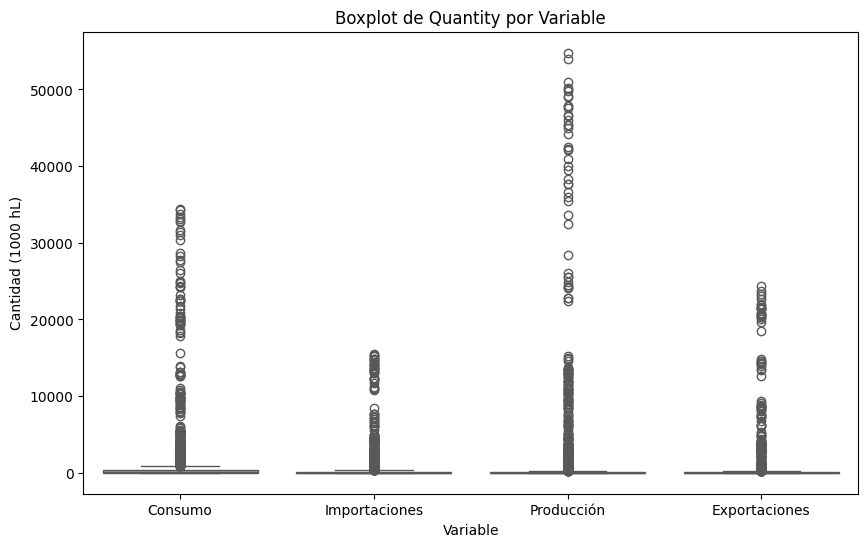

In [15]:
# Visualización de Outliers por Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfvino, x="Variable", y="Quantity", palette="Set2")
plt.title("Boxplot de Quantity por Variable")
plt.xlabel("Variable")
plt.ylabel("Cantidad (1000 hL)")
plt.show()

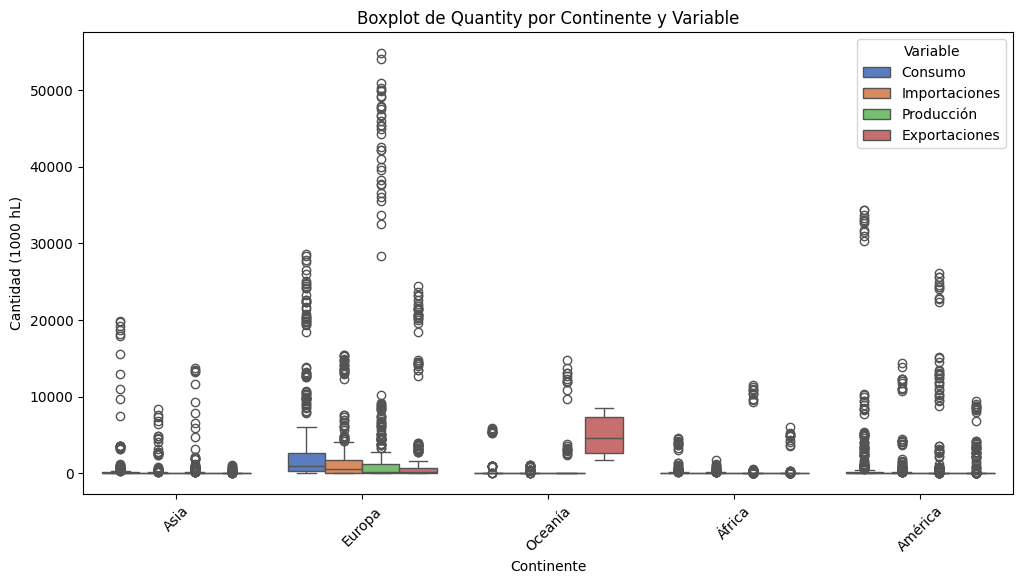

In [16]:
# Visualización de outliers por continente
# Outlers por continente
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfvino, x="Continent", y="Quantity", hue="Variable", palette="muted")
plt.title("Boxplot de Quantity por Continente y Variable")
plt.xlabel("Continente")
plt.ylabel("Cantidad (1000 hL)")
plt.legend(title="Variable")
plt.xticks(rotation=45)
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_19284\1982849774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfvino, x="Year", y="Quantity", palette="coolwarm")


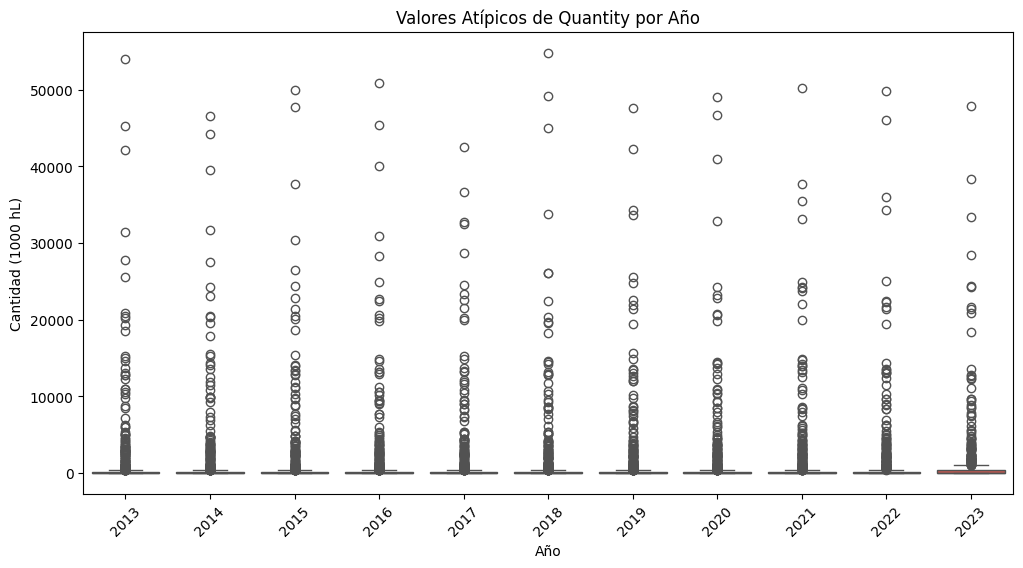

In [17]:
# Valores atípicos por año
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfvino, x="Year", y="Quantity", palette="coolwarm")
plt.title("Valores Atípicos de Quantity por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad (1000 hL)")
plt.xticks(rotation=45)  
plt.show()

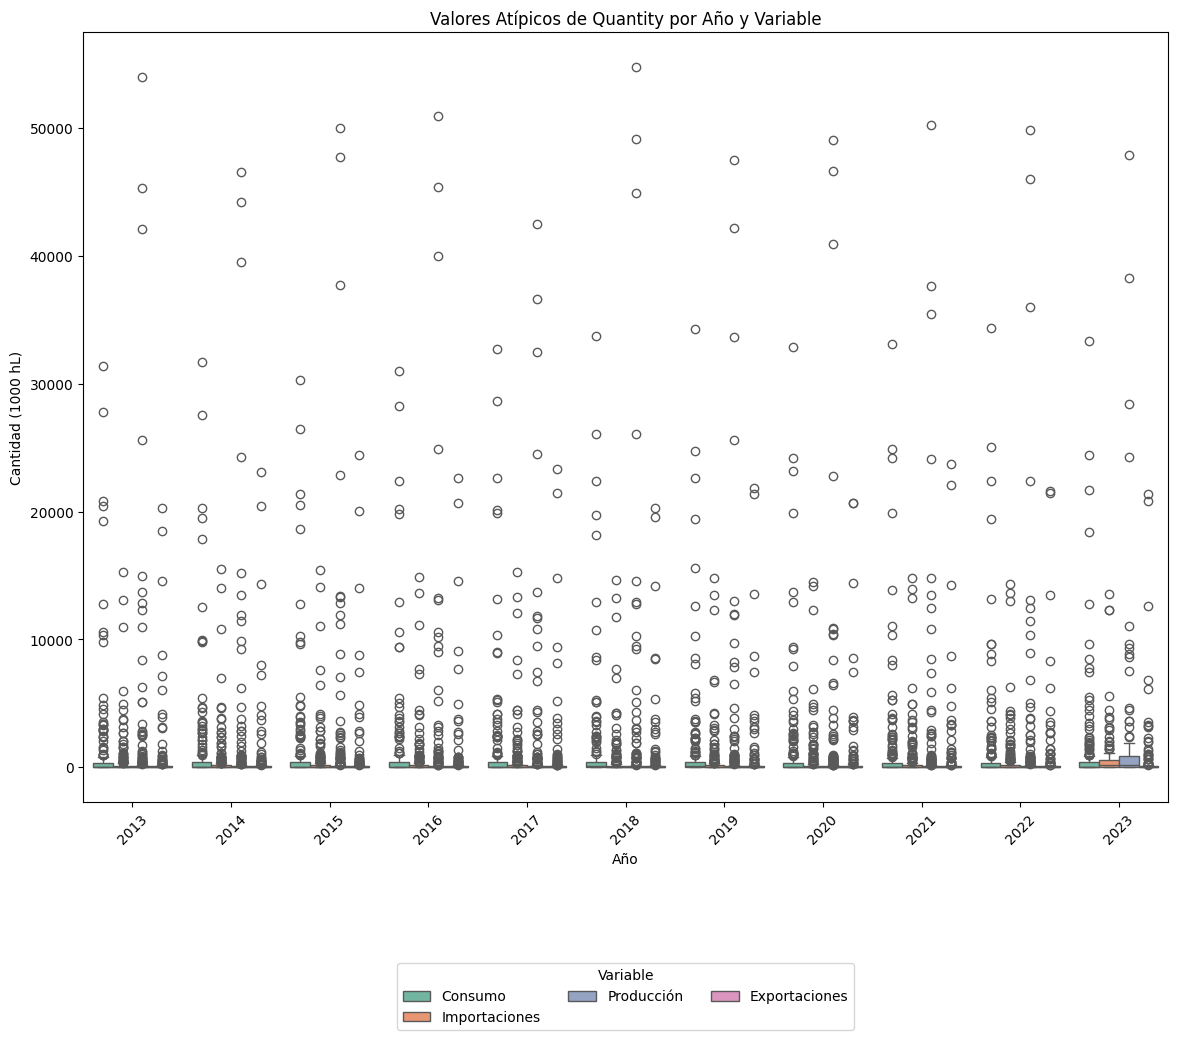

In [18]:
#Valores atípicos por año y variable
plt.figure(figsize=(14, 10))
sns.boxplot(data=dfvino, x="Year", y="Quantity", hue="Variable", palette="Set2")
plt.title("Valores Atípicos de Quantity por Año y Variable")
plt.xlabel("Año")
plt.ylabel("Cantidad (1000 hL)")
plt.legend(title="Variable", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=3)
plt.xticks(rotation=45)
plt.show()

##### Nota gráfico superior: Aquí se observa algo interesante, la producción del año 2023 se concentra.

### Correlaciones entre Quantity de diferentes Variable por país

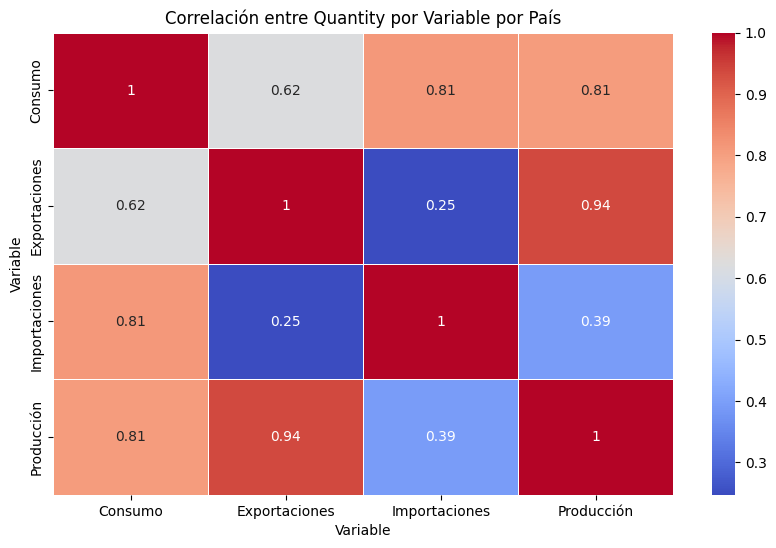

In [19]:
# Agrupar por país y Variable para obtener las cantidades por país
df_country = dfvino.pivot_table(index="Region/Country", columns="Variable", values="Quantity", aggfunc="sum")

# Calcular las correlaciones
correlation_matrix = df_country.corr()

# Mostrar el heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación entre Quantity por Variable por País")
plt.show()

##### Nota gráfico anterior: se ven relaciones como las siguientes: Consumo con Importación, Consumo con Producción y sobretodo Producción con Exportación, es una tendencia que se verá a lo largo del análisis. Por lo tanto, se podría decir que se produce porqué se exporta.

### Relación entre 'Variables'

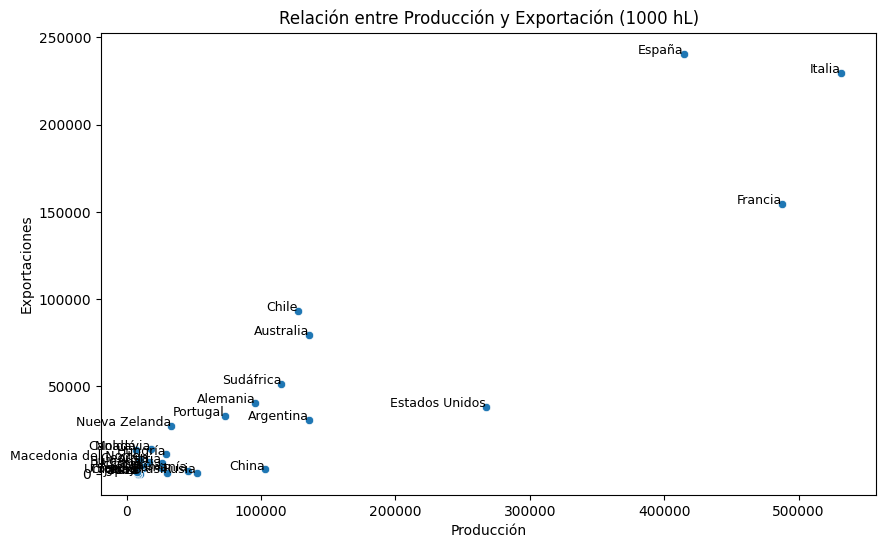

In [20]:
# Scatterplot para ver la relación entre Producción y Exportación general y especificando los 30 paises con mayor producción
# Filtrar solo las filas de Producción y Exportación
df_prod_exp_noyear = dfvino[dfvino["Variable"].isin(["Producción", "Exportaciones"])]

# Pivotar para que Producción y Exportación estén como columnas
df_prod_exp_pivot_noyear = df_prod_exp_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_prodexp = df_prod_exp_pivot_noyear.sort_values(by="Producción", ascending=False).head(30)

# Graficar la relación entre Producción y Exportación para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_prodexp, x="Producción", y="Exportaciones")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Producción y Exportación (1000 hL)")
plt.xlabel("Producción")
plt.ylabel("Exportaciones")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_prodexp)):
    plt.text(df_top30_prodexp["Producción"].iloc[i], 
             df_top30_prodexp["Exportaciones"].iloc[i],
             df_top30_prodexp.index[i], 
             fontsize=9, ha='right')

plt.show()

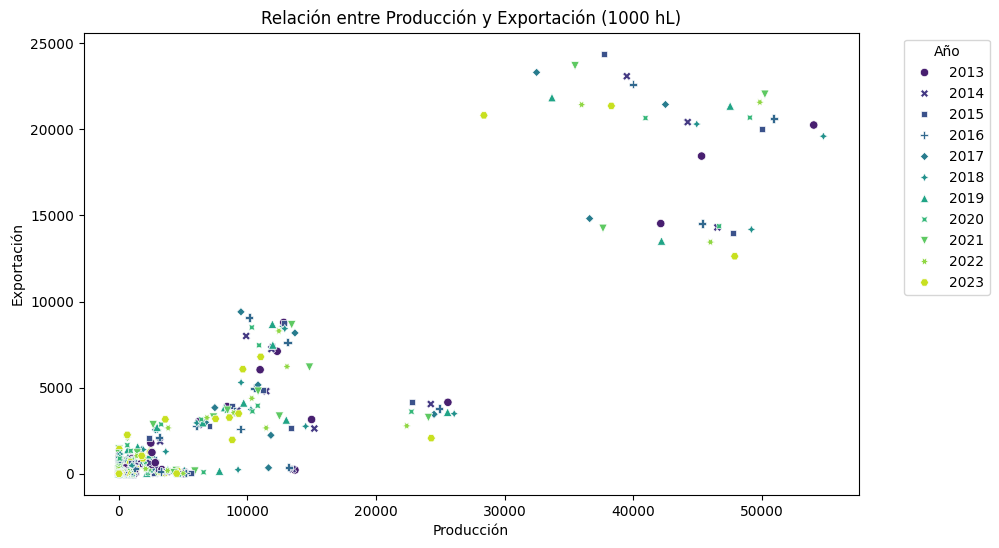

In [21]:
# Scatterplot para ver la relación entre Producción y Exportación por años
# Filtrar solo las filas de Producción y Exportación
df_prod_export = dfvino[dfvino["Variable"].isin(["Producción", "Exportaciones"])]

# Pivotar para que 'Producción' y 'Exportación' estén como columnas
df_prod_export_pivot = df_prod_export.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Producción y Exportación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prod_export_pivot, x="Producción", y="Exportaciones", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Producción y Exportación (1000 hL)")
plt.xlabel("Producción")
plt.ylabel("Exportación")

# Ajsutar la leyenda
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### Se puede observar una relación entre países que tienen una elevada producción también tienen una elevada exportación. Y a la inversa, aquellos países que producen poco tienen una exportación baja también. Comparando con el gráfico anterior donde se especifica que país es cada conjunto de datos, se conclucye que España, Italia y Francia son los que más producen y más exportan. Estados Unidos también tiene una producción considerable y una de las causas de que su producción no sea una causa de exportación es que haya mucha exportación interna. 

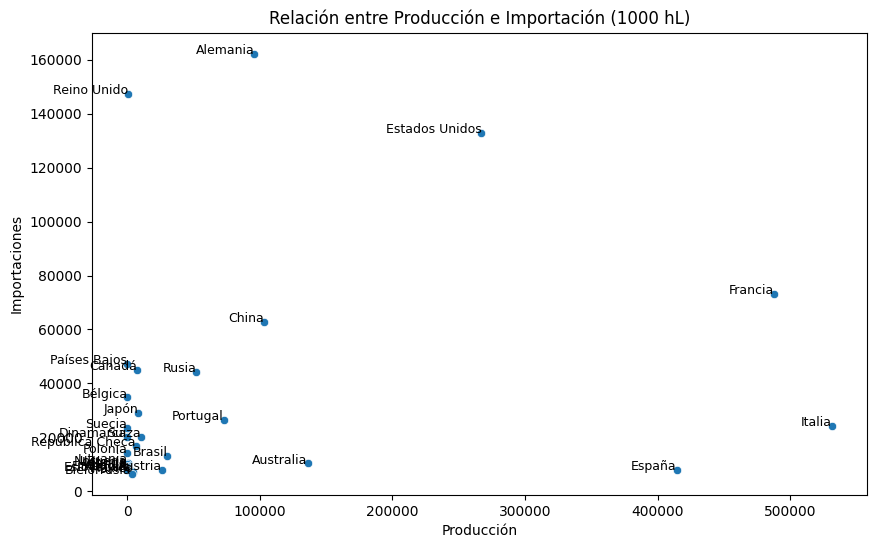

In [30]:
# Scatterplot para ver la relación entre Producción e Importación general y especificando los 30 paises con mayor producción
# Filtrar solo las filas de Producción e Importación
df_prod_import_noyear = dfvino[dfvino["Variable"].isin(["Producción", "Importaciones"])]

# Pivotar para que Producción y Importación estén como columnas
df_prod_import_pivot_noyear = df_prod_import_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_prodimp = df_prod_import_pivot_noyear.sort_values(by="Importaciones", ascending=False).head(30)

# Graficar la relación entre Producción e Importación para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_prodimp, x="Producción", y="Importaciones")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Producción e Importación (1000 hL)")
plt.xlabel("Producción")
plt.ylabel("Importaciones")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_prodimp)):
    plt.text(df_top30_prodimp["Producción"].iloc[i], 
             df_top30_prodimp["Importaciones"].iloc[i],
             df_top30_prodimp.index[i], 
             fontsize=9, ha='right')

plt.show()

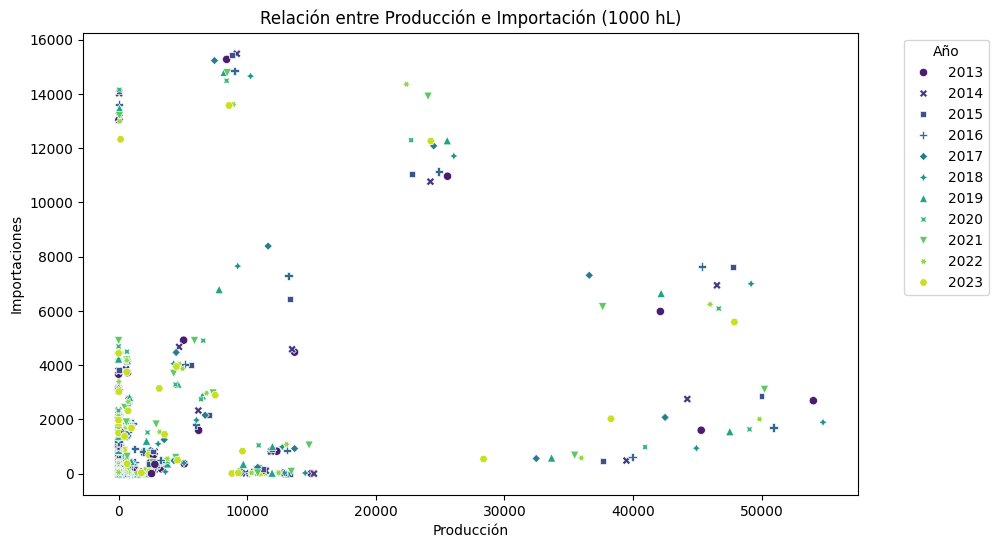

In [23]:
# Scatterplot para ver la relación entre Producción e Importación por años
# Filtrar solo las filas de Producción e Importaciones
df_prod_import = dfvino[dfvino["Variable"].isin(["Producción", "Importaciones"])]

# Pivotar para que 'Producción' e 'Importación' estén como columnas
df_prod_import_pivot = df_prod_import.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Producción e Importación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prod_import_pivot, x="Producción", y="Importaciones", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Producción e Importación (1000 hL)")
plt.xlabel("Producción")
plt.ylabel("Importaciones")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### La información que se puede destacar de este gráfico es que hay una serie de países que producen poco e importan mucho, de eso se puede inferir que son consumidores. Importante remarcar Reino Unido, ya que tiene una producción cercana a 0 pero es de los países que más Importa.

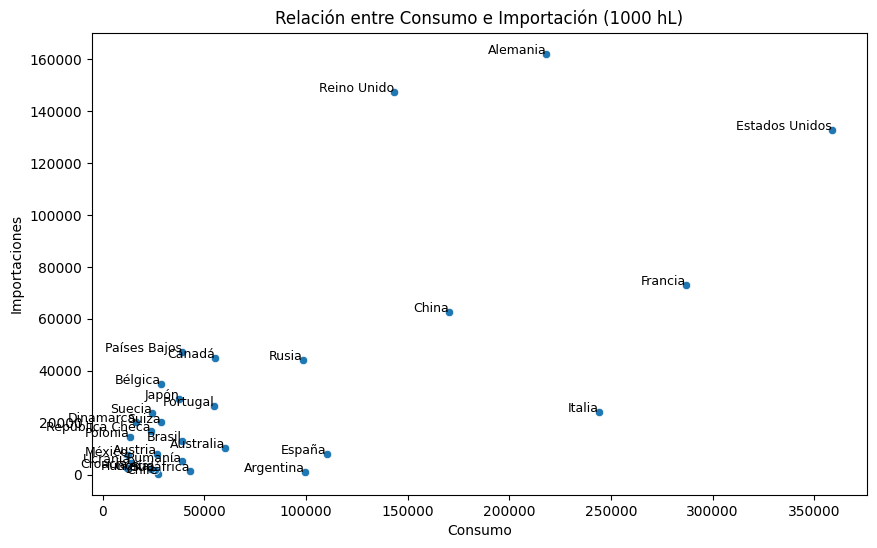

In [24]:
# Scatterplot para ver la relación entre Consumo e Importación y especificando los 30 paises con mayor consumo
# Filtrar solo las filas de Consumo e Importación
df_cons_import_noyear = dfvino[dfvino["Variable"].isin(["Consumo", "Importaciones"])]

# Pivotar para que Consumo e Importación estén como columnas
df_cons_import_pivot_noyear = df_cons_import_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_consimp = df_cons_import_pivot_noyear.sort_values(by="Consumo", ascending=False).head(30)

# Graficar la relación entre Consumo e Importación para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_consimp, x="Consumo", y="Importaciones")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Consumo e Importación (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Importaciones")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_consimp)):
    plt.text(df_top30_consimp["Consumo"].iloc[i], 
             df_top30_consimp["Importaciones"].iloc[i],
             df_top30_consimp.index[i], 
             fontsize=9, ha='right')

plt.show()


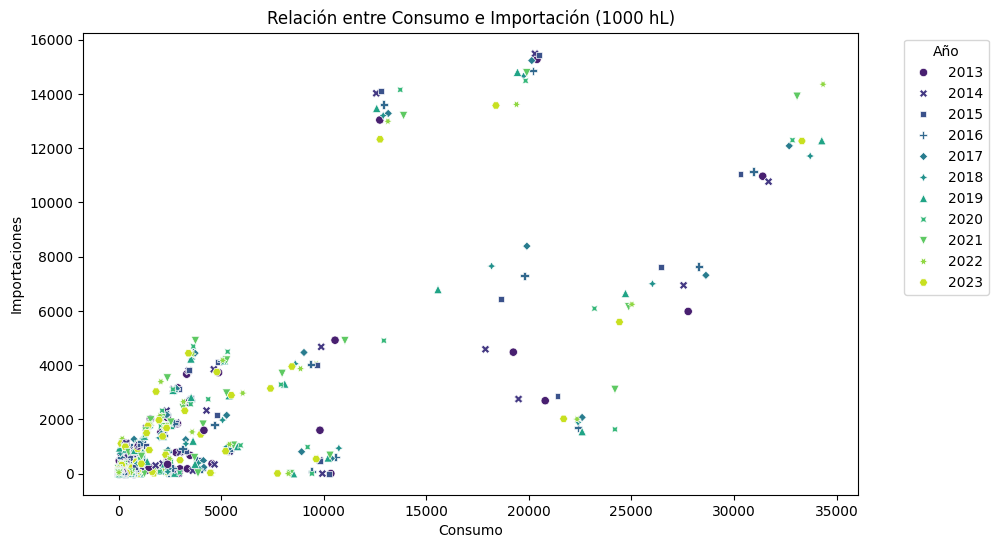

In [25]:
# Scatterplot para ver la relación entre Consumo e Importación por años
# Filtrar solo las filas de Consumo e Importaciones
df_cons_import = dfvino[dfvino["Variable"].isin(["Consumo", "Importaciones"])]

# Pivotar para que Consumo e Importaciones estén como columnas
df_cons_import_pivot = df_cons_import.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Consumo e Importaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cons_import_pivot, x="Consumo", y="Importaciones", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Consumo e Importación (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Importaciones")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### En este gráfico comparándolo con los anteriores se puede deducir que aquellos países que son consumidores y son importadores en su mayoría no son productores

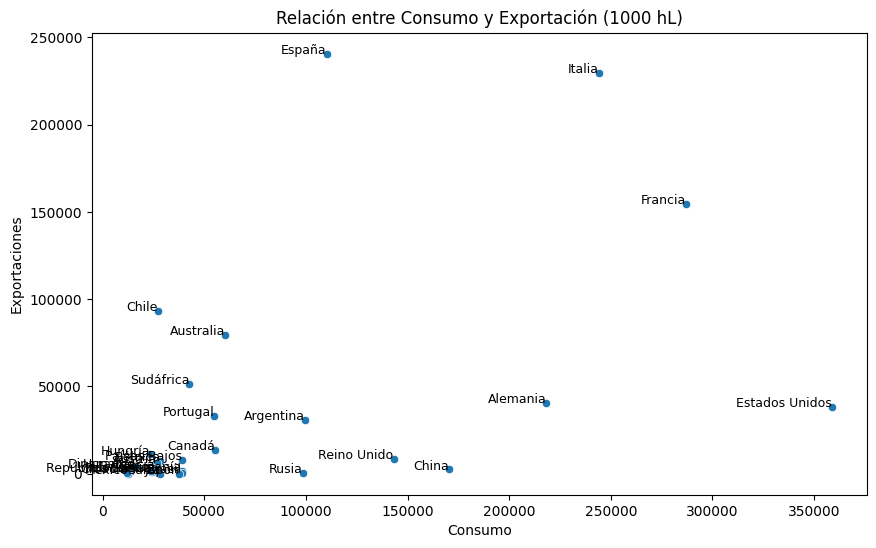

In [26]:
# Scatterplot para ver la relación entre Consumo y Exportación y especificando los 30 paises con mayor consumo
# Filtrar solo las filas de Consumo y Exportación
df_cons_exp_noyear = dfvino[dfvino["Variable"].isin(["Consumo", "Exportaciones"])]

# Pivotar para que Consumo y Exportación estén como columnas
df_cons_exp_pivot_noyear = df_cons_exp_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_consexp = df_cons_exp_pivot_noyear.sort_values(by="Consumo", ascending=False).head(30)

# Graficar la relación entre Consumo y Exportación para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_consexp, x="Consumo", y="Exportaciones")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Consumo y Exportación (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Exportaciones")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_consexp)):
    plt.text(df_top30_consexp["Consumo"].iloc[i], 
             df_top30_consexp["Exportaciones"].iloc[i],
             df_top30_consexp.index[i], 
             fontsize=9, ha='right')

plt.show()


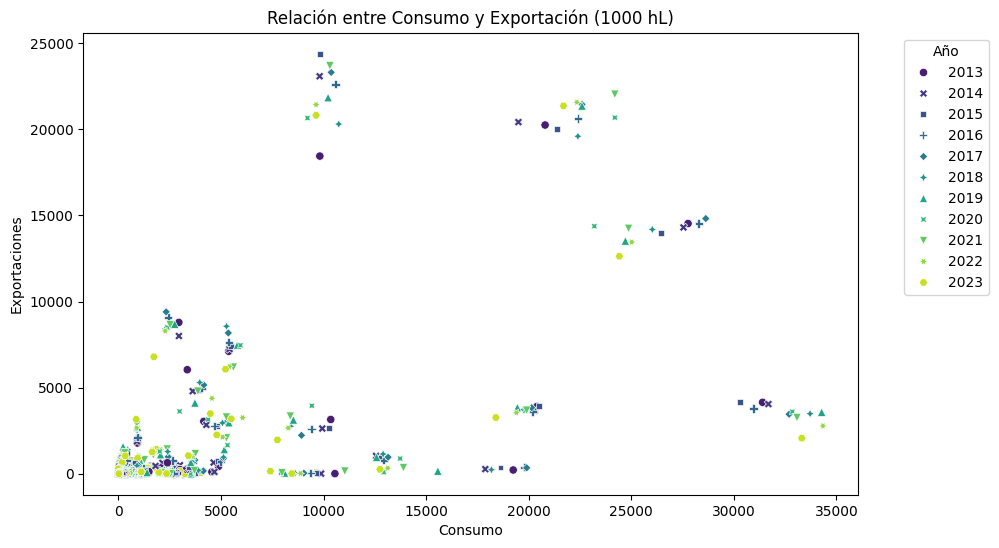

In [27]:
# Scatterplot para ver la relación entre Consumo y Exportación por años
# Filtrar solo las filas de Consumo y Exportación
df_cons_export = dfvino[dfvino["Variable"].isin(["Consumo", "Exportaciones"])]

# Pivotar para que Consumo y Exportación estén como columnas
df_cons_export_pivot = df_cons_export.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Consumo y Exportación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cons_export_pivot, x="Consumo", y="Exportaciones", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Consumo y Exportación (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Exportaciones")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### Aquí se ve como se desmarcan 3 países claves en cuanto a la cantidad de Exportaciones con la comparación con el gráfico anterior se puede saber que son España, Italia y Francia, interesante el consumo de Estados Unidos, ya que consume 7 veces lo que exporta, así que es productor no exportador.

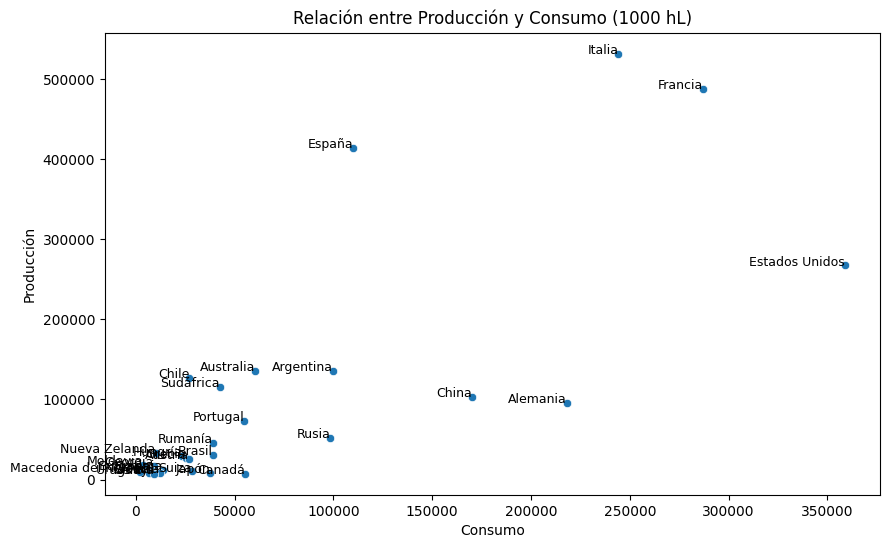

In [28]:
# Scatterplot para ver la relación entre Producción y Consumo y especificando los 30 paises con mayor producción
# Filtrar solo las filas de Producción y Consumo
df_prod_cons_noyear = dfvino[dfvino["Variable"].isin(["Producción", "Consumo"])]

# Pivotar para que Producción y Consumo estén como columnas
df_prod_cons_pivot_noyear = df_prod_cons_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_prodcons = df_prod_cons_pivot_noyear.sort_values(by="Producción", ascending=False).head(30)

# Graficar la relación entre Producción y Consumo para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_prodcons, x="Consumo", y="Producción")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Producción y Consumo (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Producción")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_prodcons)):
    plt.text(df_top30_prodcons["Consumo"].iloc[i], 
             df_top30_prodcons["Producción"].iloc[i],
             df_top30_prodcons.index[i], 
             fontsize=9, ha='right')

plt.show()


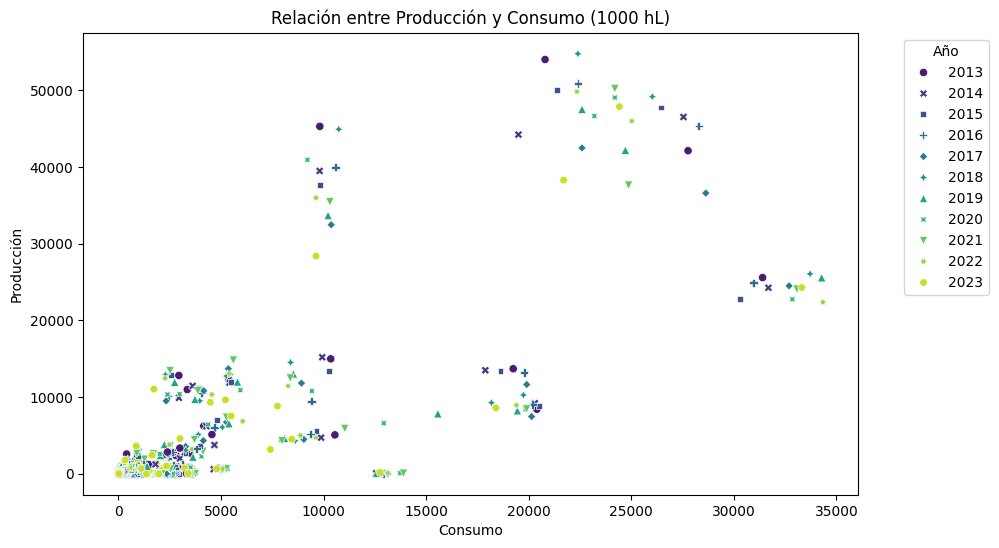

In [29]:
# Scatterplot para ver la relación entre Producción y Consumo por años
# Filtrar solo las filas de Producción y Consumo
df_prod_cons = dfvino[dfvino["Variable"].isin(["Producción", "Consumo"])]

# Pivotar para que 'Producción y Consumo' estén como columnas
df_prod_cons_pivot = df_prod_cons.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Producción y Consumo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_prod_cons_pivot, x="Consumo", y="Producción", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Producción y Consumo (1000 hL)")
plt.xlabel("Consumo")
plt.ylabel("Producción")

# Ajsutar la leyenda
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### Hay países en los que se marca una tendencia de consumo y producción, producen y consumen a la par. 

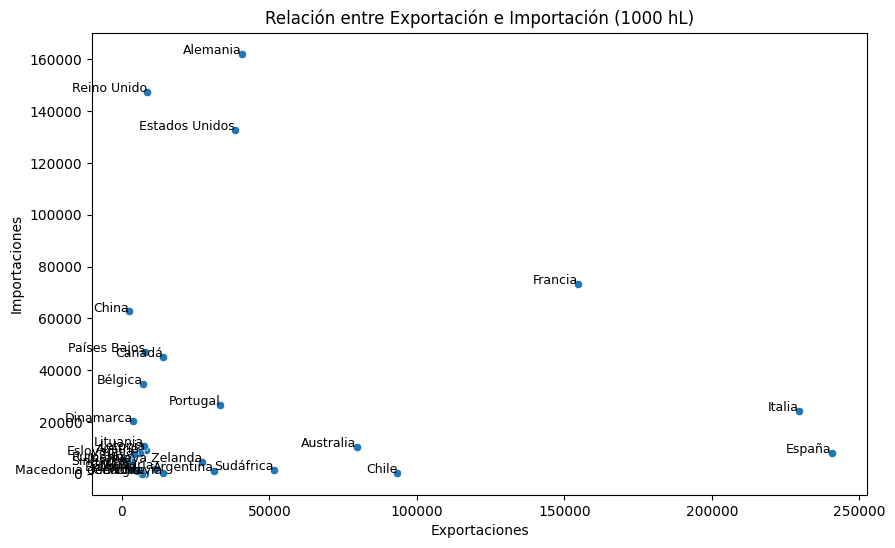

In [45]:
# Scatterplot para ver la relación entre Exportación e Importación y especificando los 30 paises con mayor exportación
# Filtrar solo las filas de Exportación e Importación
df_exp_import_noyear = dfvino[dfvino["Variable"].isin(["Exportaciones", "Importaciones"])]

# Pivotar para que Exportación e Importación estén como columnas
df_exp_import_pivot_noyear = df_exp_import_noyear.pivot_table(index=["Region/Country"], columns="Variable", values="Quantity", aggfunc="sum")

# Ordenar y seleccionar los top 30
df_top30_expimp = df_exp_import_pivot_noyear.sort_values(by="Exportaciones", ascending=False).head(30)

# Graficar la relación entre Exportación e Importación para los top 30
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top30_expimp, x="Exportaciones", y="Importaciones")

# Añadir el título y etiquetas de los ejes
plt.title("Relación entre Exportación e Importación (1000 hL)")
plt.xlabel("Exportaciones")
plt.ylabel("Importaciones")

# Agregar etiquetas de los países (top 30)
for i in range(len(df_top30_expimp)):
    plt.text(df_top30_expimp["Exportaciones"].iloc[i], 
             df_top30_expimp["Importaciones"].iloc[i],
             df_top30_expimp.index[i], 
             fontsize=9, ha='right')

plt.show()


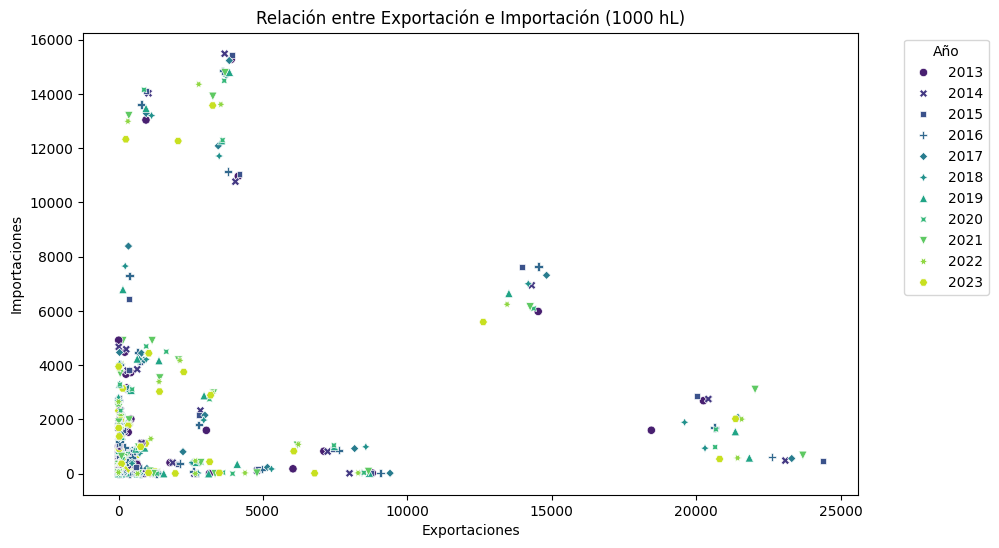

In [54]:
# Scatterplot para ver la relación entre Exportación e Importación
# Filtrar solo las filas de Exportación e Importación
df_export_import = dfvino[dfvino["Variable"].isin(["Exportaciones", "Importaciones"])]

# Pivotar para que Exportación e Importación estén como columnas
df_export_import_pivot = df_export_import.pivot_table(index=["Region/Country", "Year"], columns="Variable", values="Quantity", aggfunc="sum")

# Graficar la relación entre Exportación e Importación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_export_import_pivot, x="Exportaciones", y="Importaciones", hue="Year", style="Year", palette="viridis")
plt.title("Relación entre Exportación e Importación (1000 hL)")
plt.xlabel("Exportaciones")
plt.ylabel("Importaciones")

# Ajsutar la leyenda
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### Se diferencian 2 grupos opuestos, aquellos que más importan frente a aquellos que más exportan. Se sigue observando la misma tendencia de los 3 grandes importadores, Estados Unidos, Reino Unido y Alemania, y los 3 grandes exportadores, Francia, Italia y España.  

### Heatmap

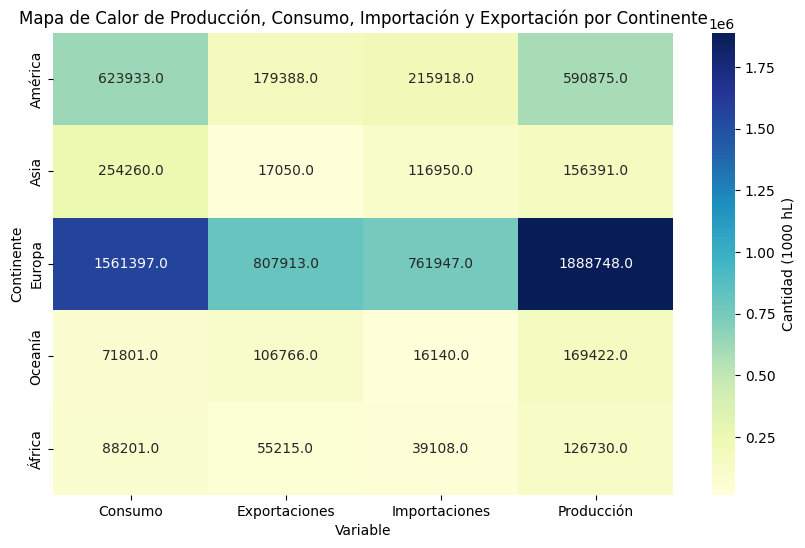

In [25]:
# Crear un mapa de calor para ver la producción, consumo, importación y exportación por continente
# Genaración del df con las variables Producción, Consumo, Importaciones y Exportaciones
df_hp_prod_cons = dfvino[dfvino["Variable"].isin(["Producción", "Consumo", "Importaciones", "Exportaciones"])] 

# Pivotar los datos para que tengamos Continente como filas y Variable como columnas
df_hp_prod_cons_pivot = df_hp_prod_cons.pivot_table(index="Continent", columns="Variable", values="Quantity", aggfunc="sum")

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df_hp_prod_cons_pivot, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Cantidad (1000 hL)'})
plt.title("Mapa de Calor de Producción, Consumo, Importación y Exportación por Continente")
plt.ylabel("Continente")
plt.xlabel("Variable")
plt.show()

##### Claramente se observa una hegemonía por parte de Europa del mercado vinícola en todas sus formas, Consumo, Exportación, Importación y Producción. Se observan aperturas de nuevos mercados como América seguido de Asia igual que los competidores como es América en materia de Producción.

#### Visualización en tablas de: producción, exportación, importación y consumo

In [26]:
# Top 10 países con mayor producción
# Producción
df_produccion = dfvino[dfvino['Variable'] == 'Producción']

# Agrupación de país y sumar cantidades
produccion_pais = (df_produccion.groupby('Region/Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False))

print(produccion_pais.head(10))

     Region/Country  Quantity
99           Italia  531422.0
72          Francia  487993.0
63           España  414354.0
64   Estados Unidos  267191.0
13        Australia  136015.0
10        Argentina  135894.0
41            Chile  127302.0
187       Sudáfrica  115095.0
42            China  102869.0
2          Alemania   95777.0


In [27]:
# Top 10 países con mayor exportación
# Exportaciones
df_exportaciones = dfvino[dfvino['Variable'] == 'Exportaciones']

# Agrupación de país y sumar cantidades
exportaciones_pais = (df_exportaciones.groupby('Region/Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False))

print(exportaciones_pais.head(10))

     Region/Country  Quantity
49           España  240629.0
73           Italia  229406.0
56          Francia  154597.0
31            Chile   93375.0
8         Australia   79586.0
135       Sudáfrica   51498.0
1          Alemania   40679.0
50   Estados Unidos   38401.0
113        Portugal   33241.0
5         Argentina   31079.0


In [28]:
# Top 10 países con mayor importación
#Importaciones
df_importaciones = dfvino[dfvino['Variable'] == 'Importaciones']

#Agrupación de país y sumar cantidades
importaciones_pais = (df_importaciones.groupby('Region/Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False))

print(importaciones_pais.head(10))

     Region/Country  Quantity
2          Alemania  162170.0
152     Reino Unido  147404.0
61   Estados Unidos  132814.0
69          Francia   73224.0
41            China   62652.0
147    Países Bajos   47145.0
37           Canadá   45057.0
160           Rusia   44280.0
33          Bélgica   34825.0
98            Japón   29007.0


In [29]:
# Top 10 países con mayor Consumo
#Consumo
df_consumo = dfvino[dfvino['Variable'] == 'Consumo']

#Agrupación de país y sumar cantidades
consumo_pais = (df_consumo.groupby('Region/Country')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False))

print(consumo_pais.head(10))

     Region/Country  Quantity
56   Estados Unidos  358653.0
64          Francia  286953.0
90           Italia  244152.0
2          Alemania  218284.0
37            China  170227.0
142     Reino Unido  143166.0
55           España  110156.0
9         Argentina   99668.0
150           Rusia   98442.0
11        Australia   60267.0


### Visualización en gráficos de barra de: producción, exportación, importación y consumo

##### Nota: Las variables que contienen los datos de producción, exportación, importación y consumo ya están ejecutadas en el apartado anterior: "Visualización en tablas de: producción, exportación, importación y consumo".

C:\Users\usuari\AppData\Local\Temp\ipykernel_9084\2579728345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region/Country', y='Quantity', data=produccion_pais.head(10), palette='Blues_d')


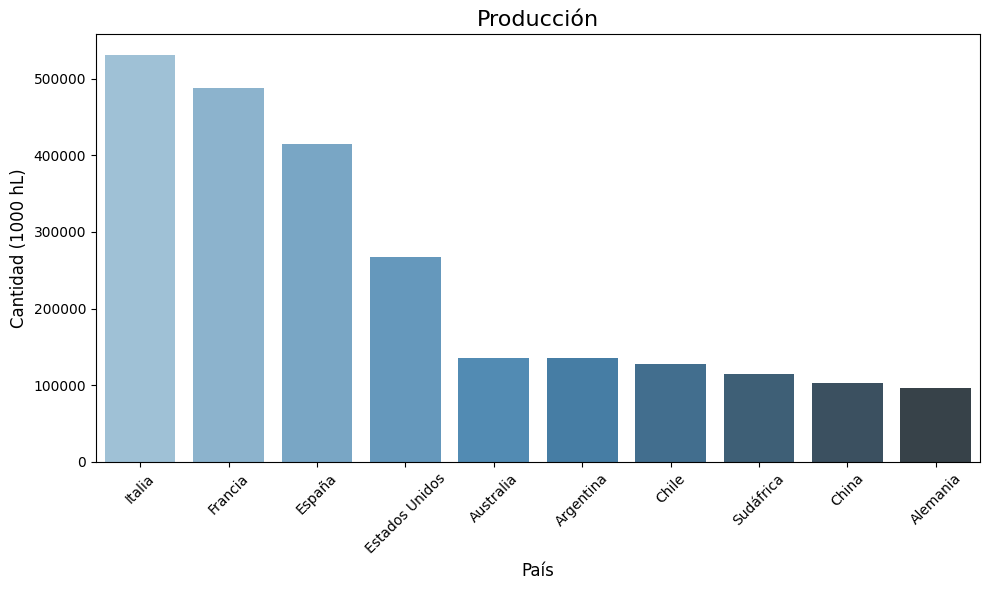

In [30]:
# Crear gráfico de barras
# Tamaño del gráfico
plt.figure(figsize=(10, 6))  
sns.barplot(x='Region/Country', y='Quantity', data=produccion_pais.head(10), palette='Blues_d')

# Añadir título y etiquetas
plt.title('Producción', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad (1000 hL)', fontsize=12)
# Mostrar gráfico
plt.tight_layout()  # Asegura que los elementos no se superpongan
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_9084\103606483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region/Country', y='Quantity', data=exportaciones_pais.head(10), palette='Blues_d')


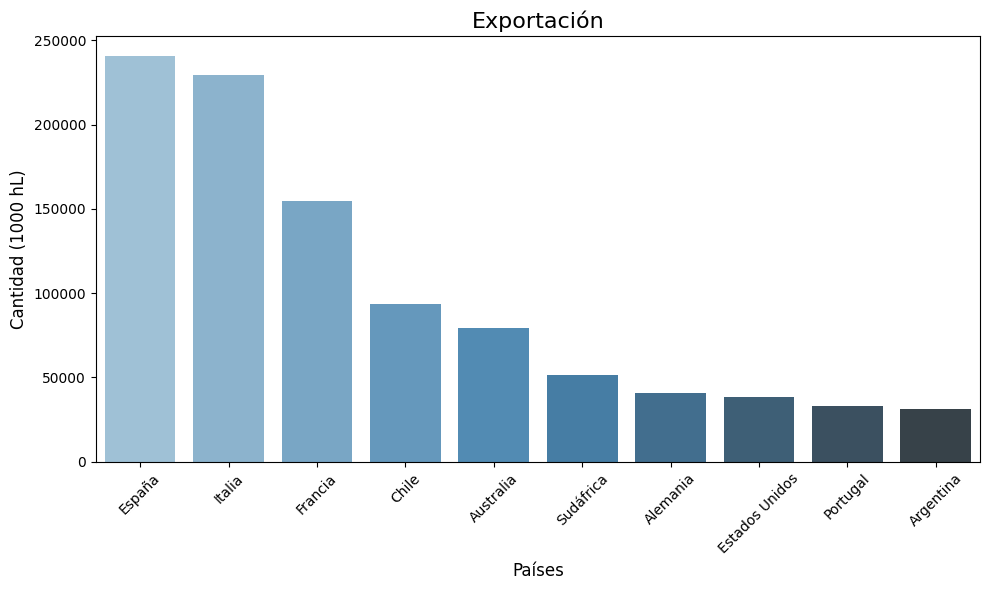

In [31]:
#Selección de los 10 paises que más exportan vino

# Crear gráfico de barras
# Tamaño del gráfico
plt.figure(figsize=(10, 6))  
sns.barplot(x='Region/Country', y='Quantity', data=exportaciones_pais.head(10), palette='Blues_d')

# Añadir título y etiquetas
plt.title('Exportación', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Cantidad (1000 hL)', fontsize=12)

# Mostrar gráfico 
# Asegura que los elementos no se superpongan
plt.tight_layout() 
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_9084\1977225820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region/Country', y='Quantity', data=importaciones_pais.head(10), palette='Blues_d')


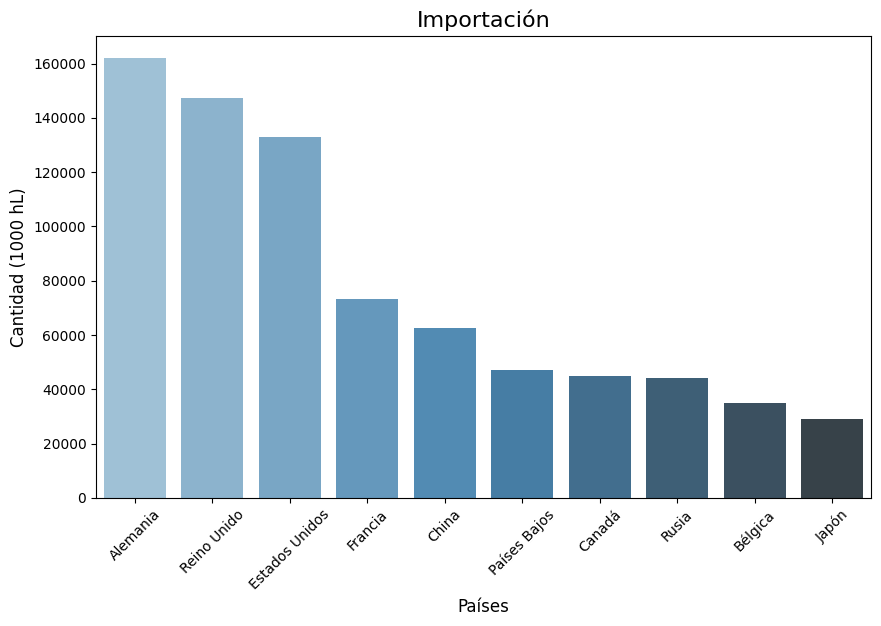

<Figure size 640x480 with 0 Axes>

In [32]:
# Selección de los 10 paises que más importan vino
# Crear gráfico de barras 
# Tamaño del gráfico
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Region/Country', y='Quantity', data=importaciones_pais.head(10), palette='Blues_d')

# Añadir título y etiquetas
plt.title('Importación', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Cantidad (1000 hL)', fontsize=12)

# Mostrar gráfico
# Asegura que los elementos no se superpongan
plt.show()
plt.tight_layout()  

C:\Users\usuari\AppData\Local\Temp\ipykernel_9084\2785247831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region/Country', y='Quantity', data=consumo_pais.head(10), palette='Blues_d')


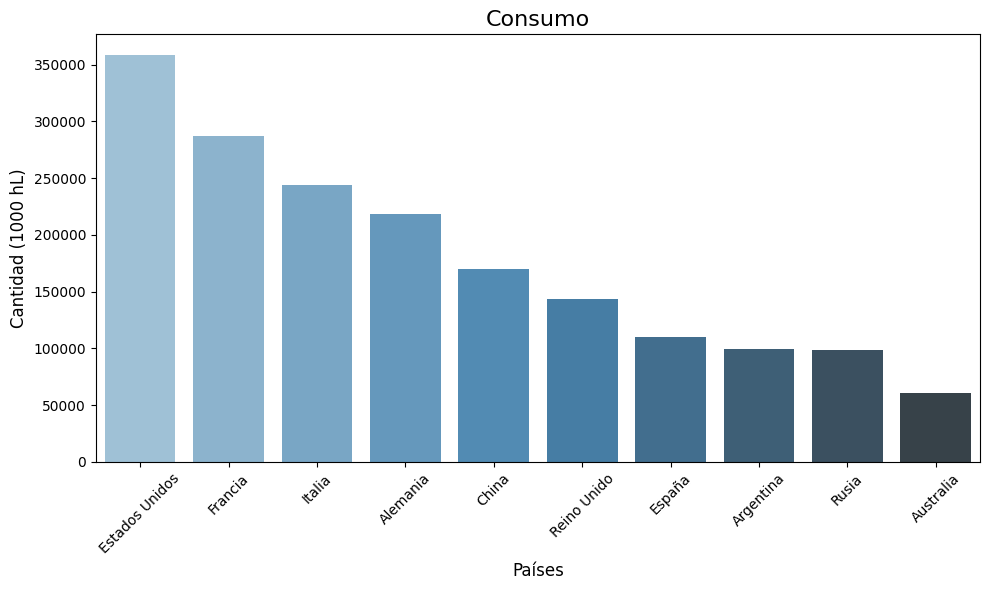

In [33]:
# Selección de los 10 paises que más consumen vino
# Crear gráfico de barras
# Tamaño del gráfico
plt.figure(figsize=(10, 6))  
sns.barplot(x='Region/Country', y='Quantity', data=consumo_pais.head(10), palette='Blues_d')

# Añadir título y etiquetas
plt.title('Consumo', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Cantidad (1000 hL)', fontsize=12)

# Mostrar gráfico
# Asegura que los elementos no se superpongan
plt.tight_layout()  
plt.show()

### Gráficos lineales en los que se muestran los países que en algun momento de los años 2013-2023 han sido los 10 países que más han producido, exportado, importado y/o consumido vino

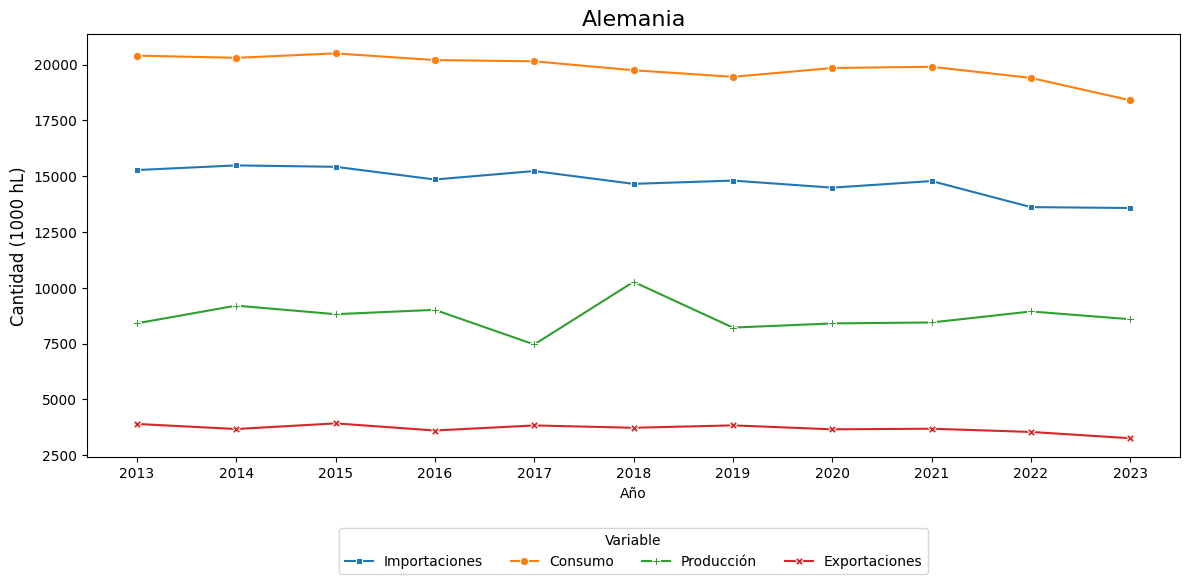

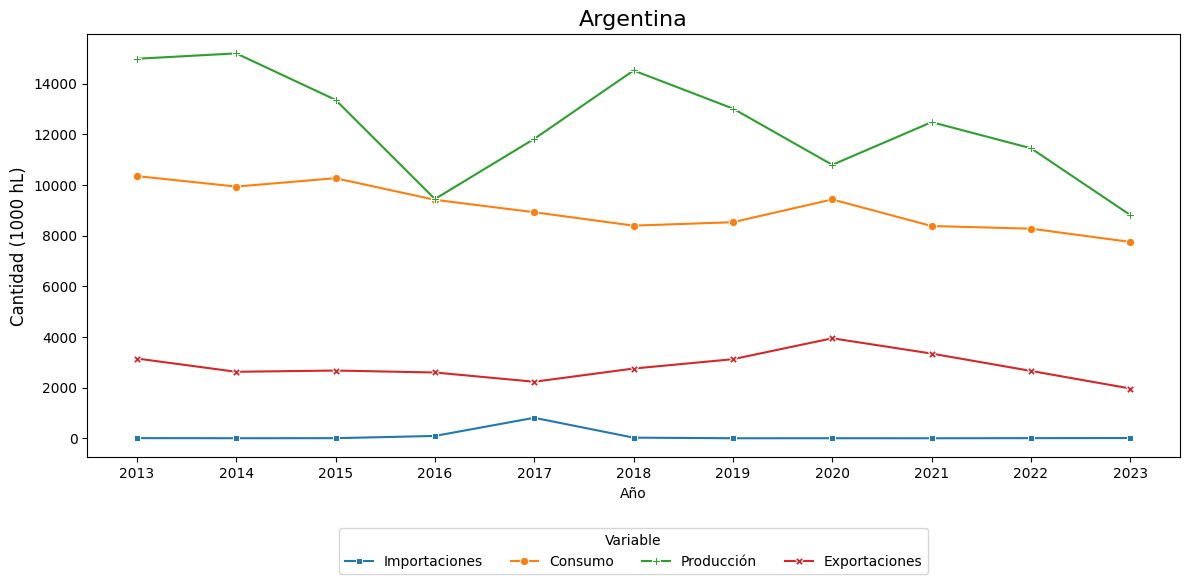

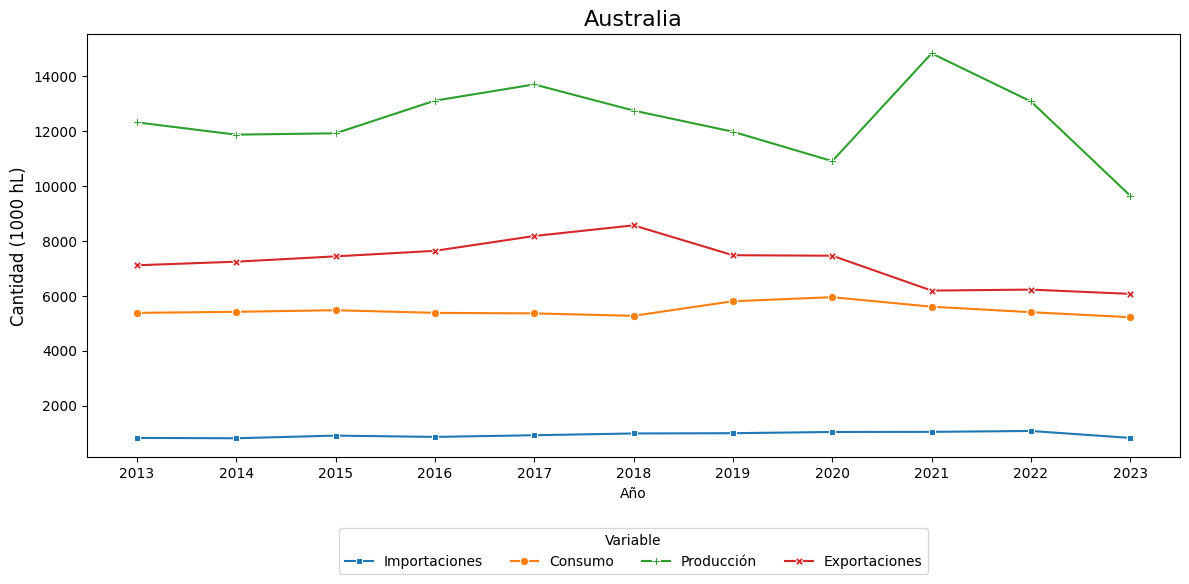

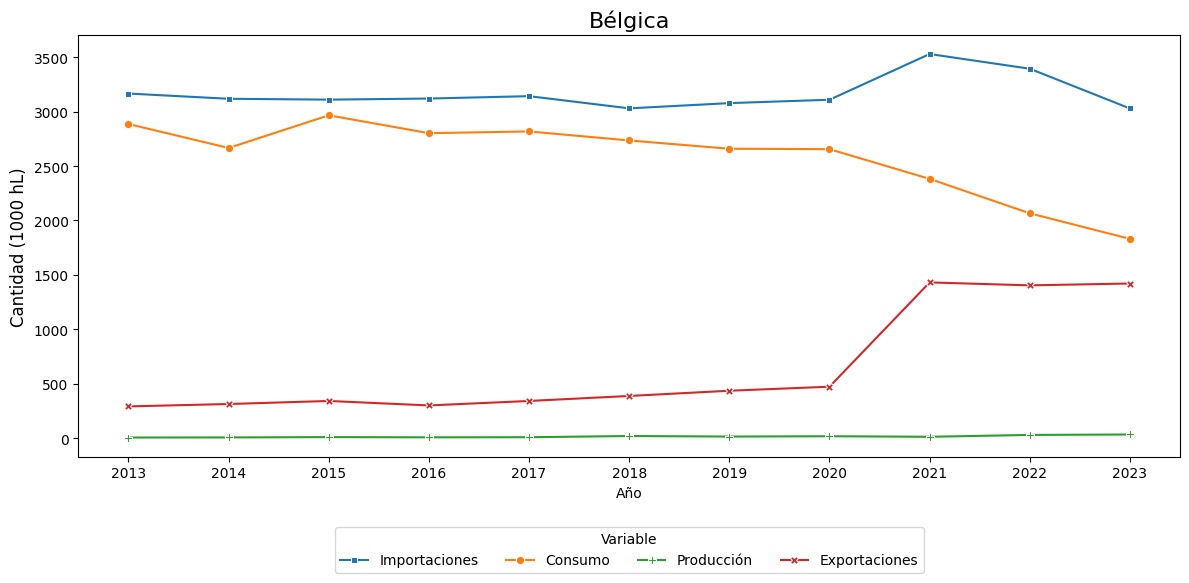

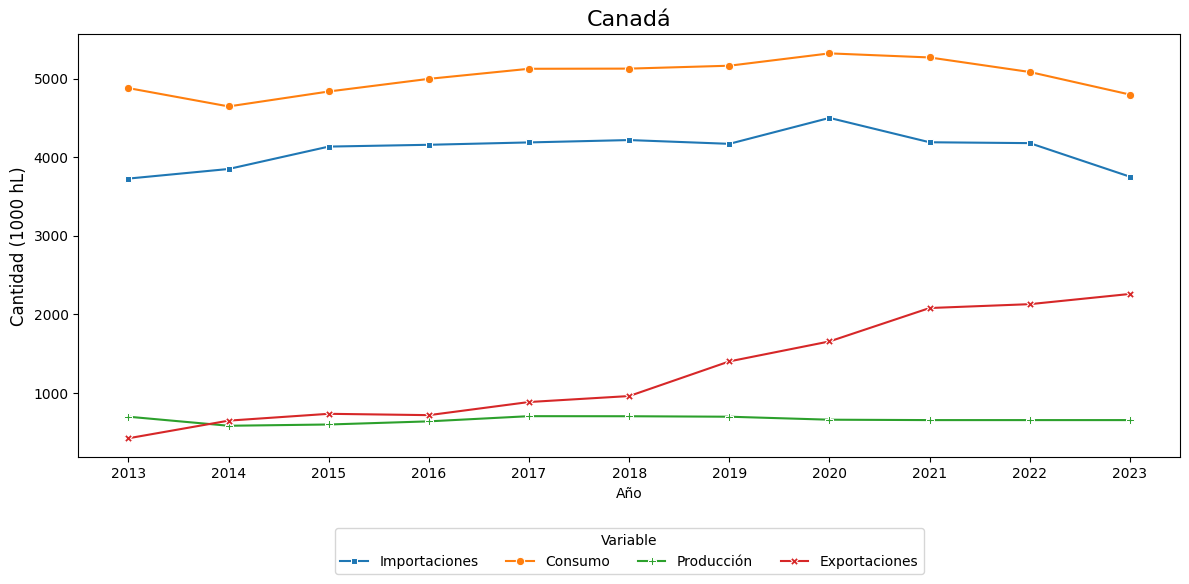

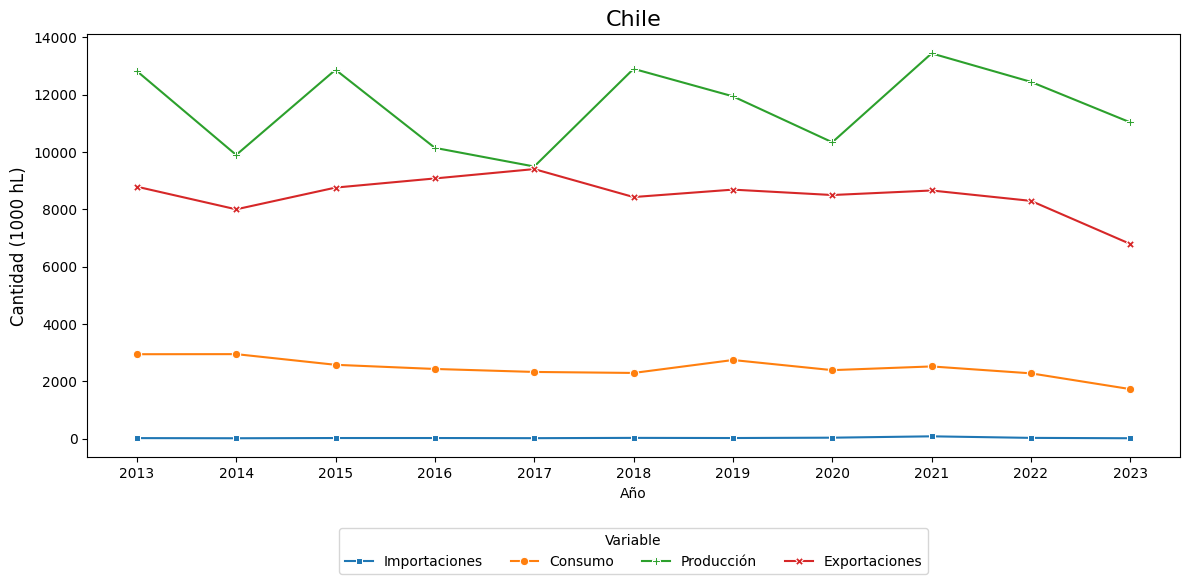

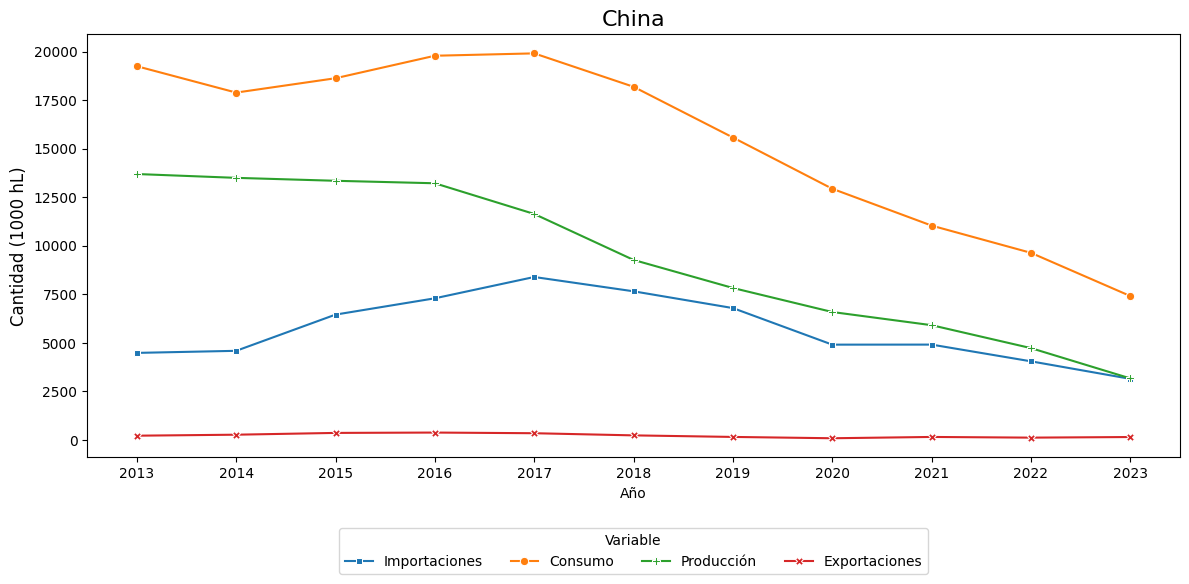

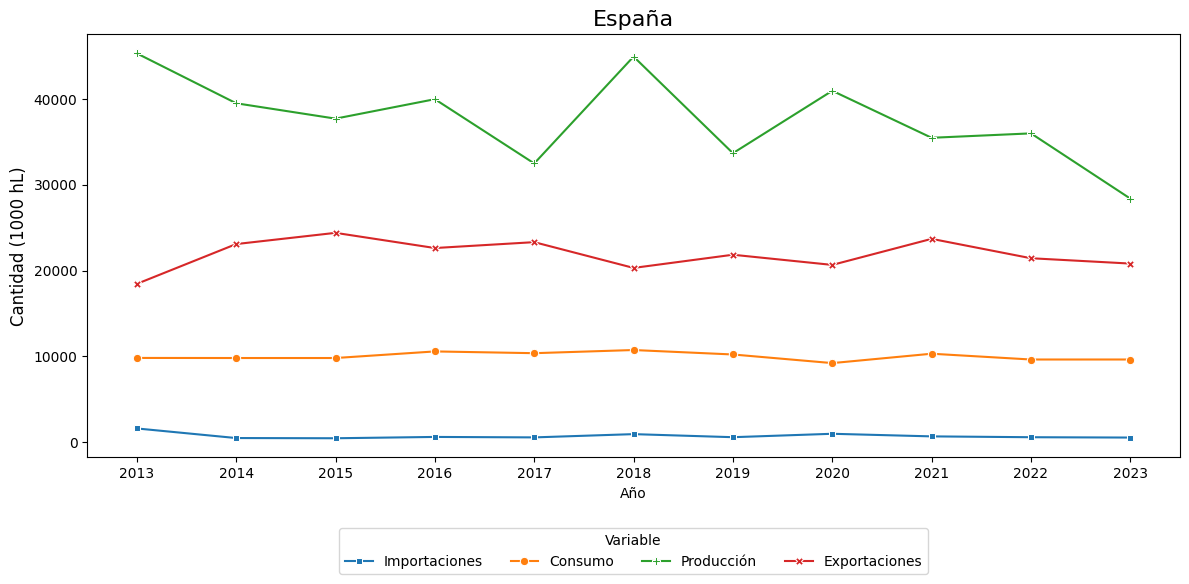

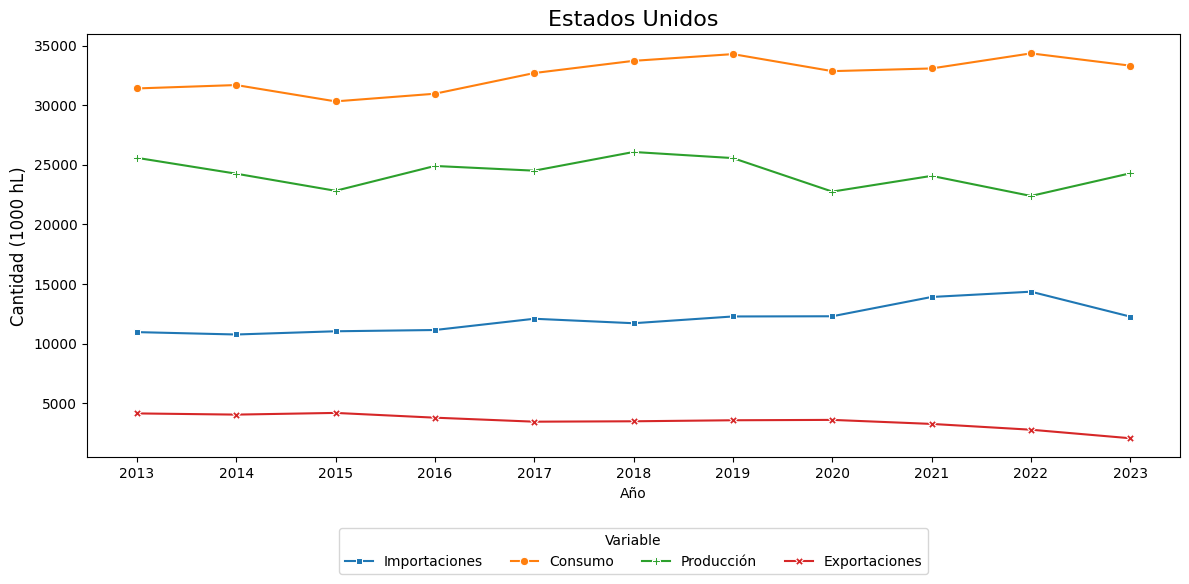

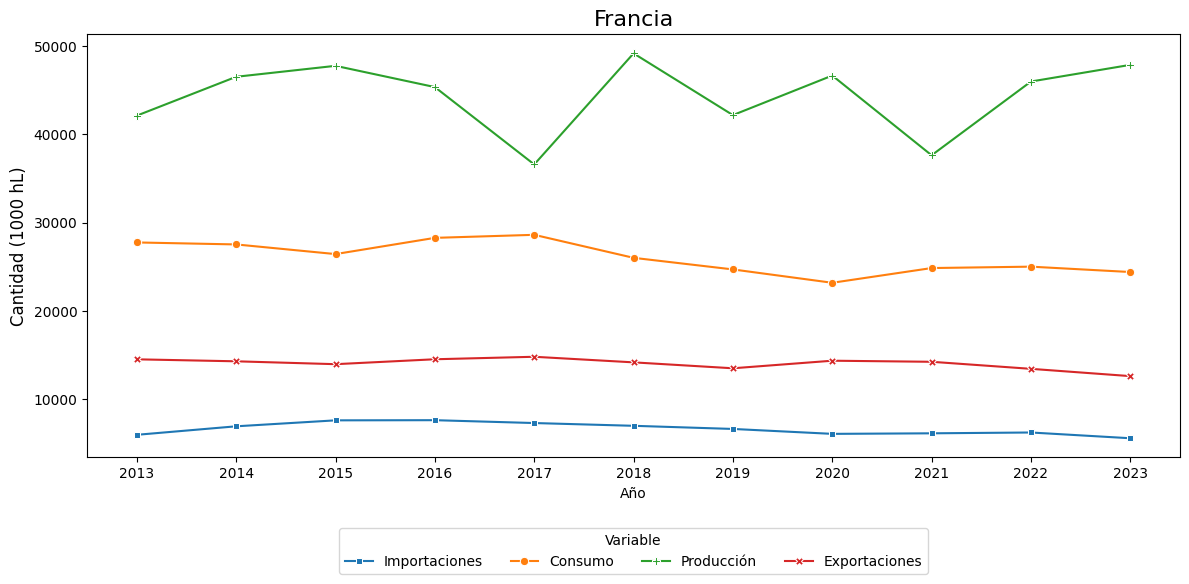

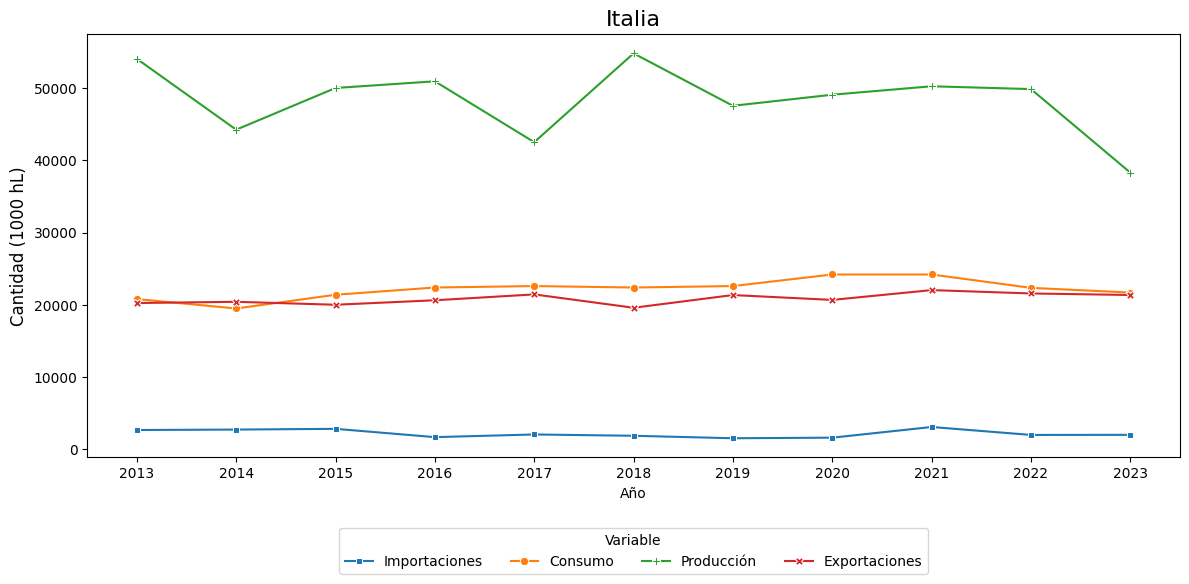

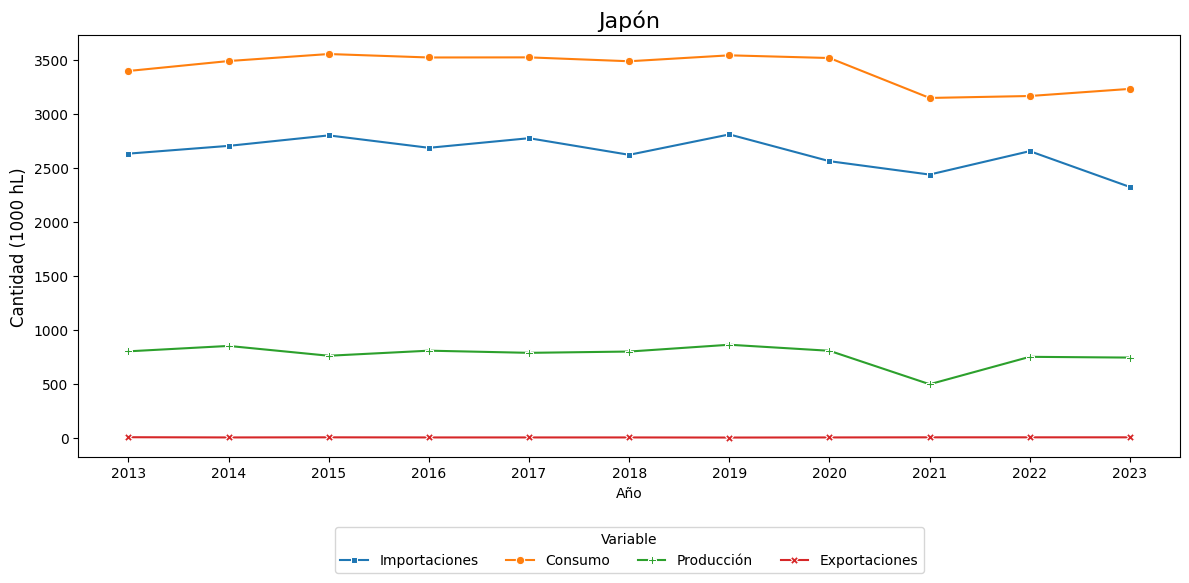

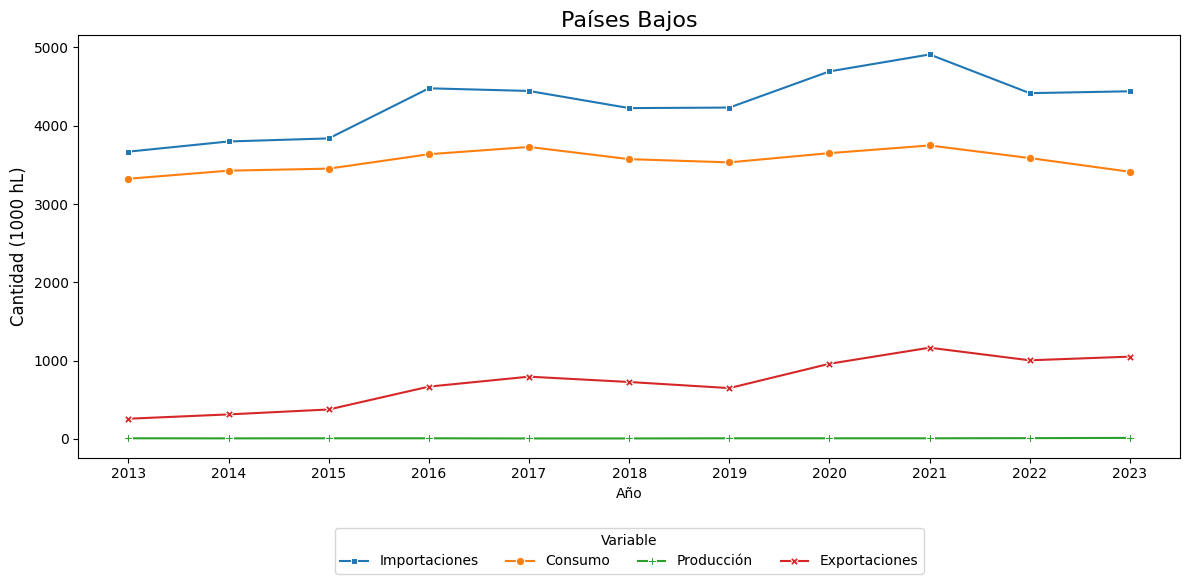

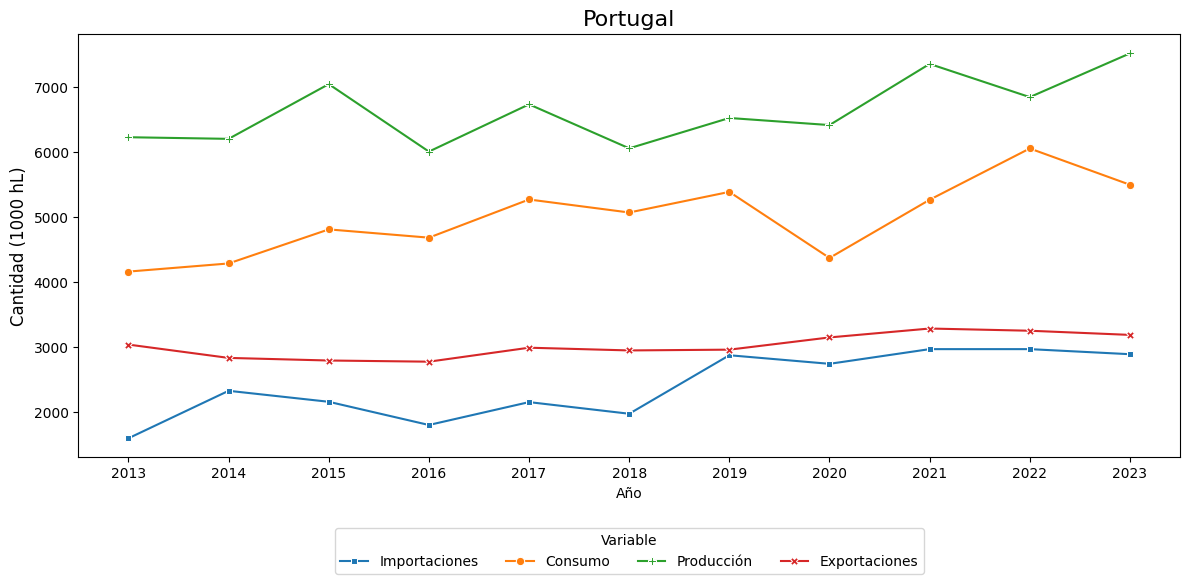

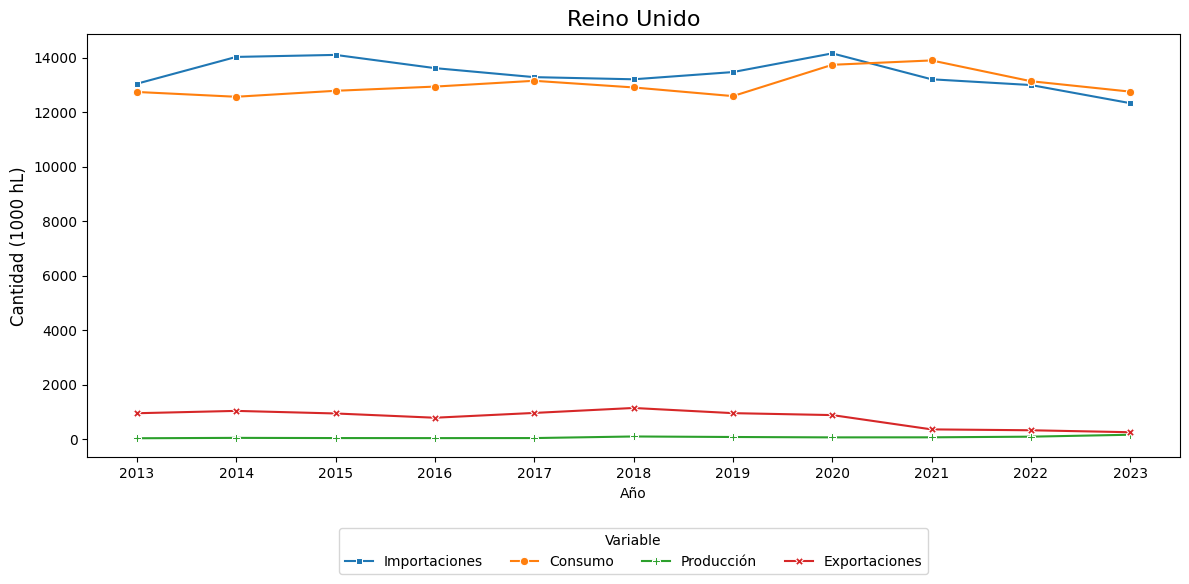

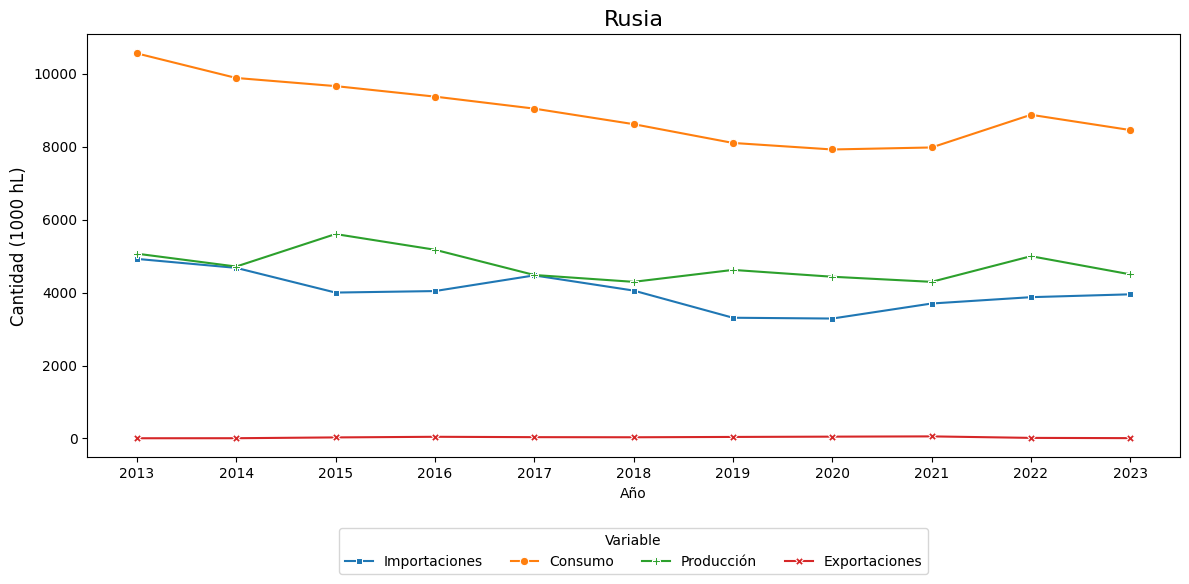

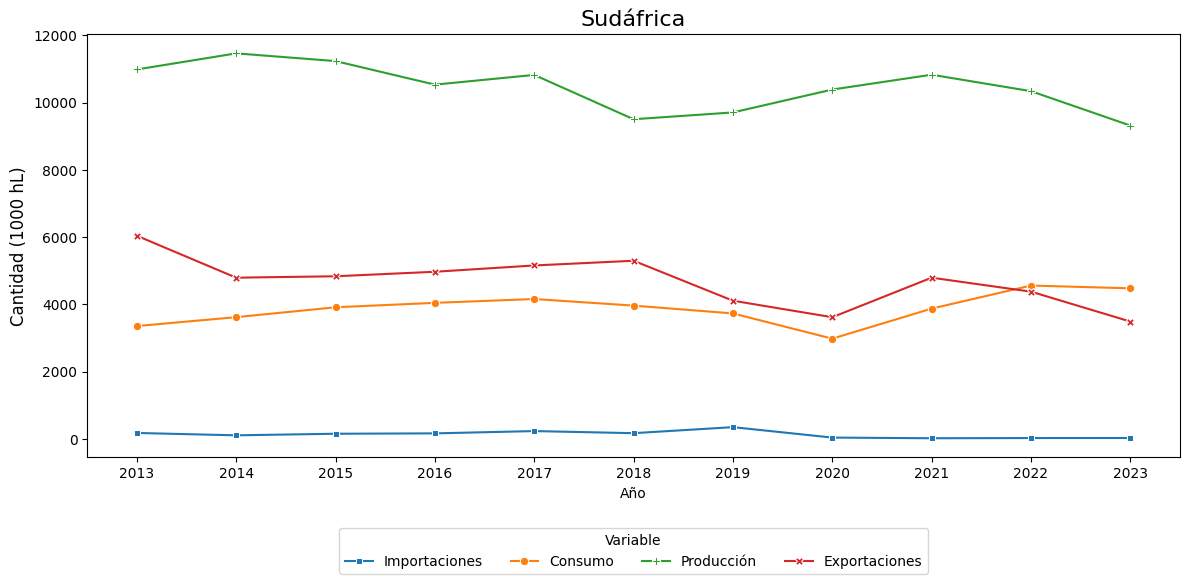

In [34]:
# Italia, Francia,  España, Estados Unidos, Australia, Argentina, Chile, Sudáfrica, China, Alemania, 
# Portugal, Reino Unido, Países Bajos, Canadá, Rusia, Bélgica, Japón 
# Filtrar por los países de interés
df_interes_individual = dfvino[dfvino['Region/Country'].isin(['España', 'Francia', 'Italia', 'Alemania',
                                                   'Estados Unidos', 'Argentina', 'Chile', 'Australia', 'Sudáfrica', 'China',
                                                   'Portugal', 'Reino Unido', 'Países Bajos', 'Canadá', 'Rusia', 'Bélgica', 'Japón'])]
                                                 

# Filtrar las filas donde la Variable sea una de las de interés
df_interes_individual = df_interes_individual[df_interes_individual['Variable'].isin(['Importaciones', 'Consumo', 'Producción', 'Exportaciones'])]

# Agrupar por Region/Country y Year, y sumar las cantidades de las variables
df_agrupado = (
    df_interes_individual.groupby(['Region/Country', 'Year', 'Variable'])['Quantity']
    .sum()
    .reset_index()
)

# Crear un gráfico para cada país
for pais in df_agrupado['Region/Country'].unique():
    df_pais = df_agrupado[df_agrupado['Region/Country'] == pais]
    # Tamaño del gráfico
    plt.figure(figsize=(12, 6))  

    sns.lineplot(data=df_pais, x='Year', y='Quantity', hue='Variable', 
                 style='Variable', markers=True, dashes=False, 
                 hue_order=['Importaciones', 'Consumo', 'Producción', 'Exportaciones'])
    
    # Ajustar título y etiquetas
    plt.title(f'{pais}', fontsize=16)
    plt.xlabel('Año', fontsize=10)
    plt.ylabel('Cantidad (1000 hL)', fontsize=12)

    # Colocar la leyenda debajo del eje X
    plt.legend(title='Variable', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    
    # Mejorar diseño
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()     


#### Graficación lineal donde se analizan los top 10 de los años 2013 - 2023 en cuanto a producción, exportación, importación y consumo

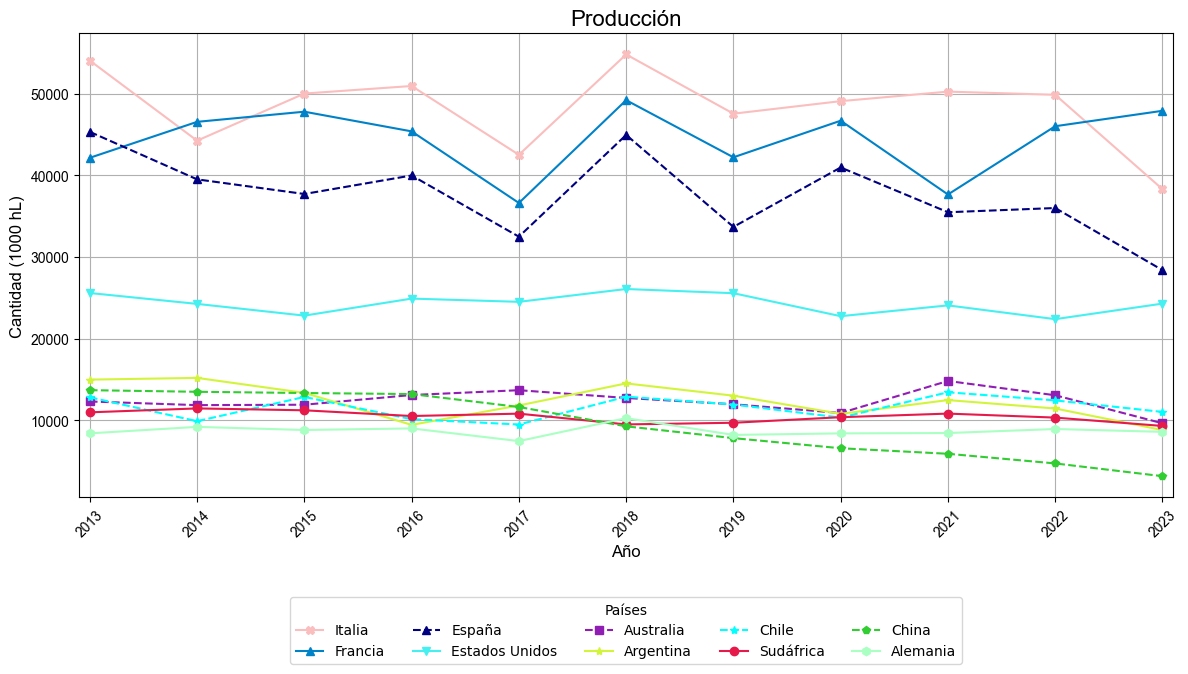

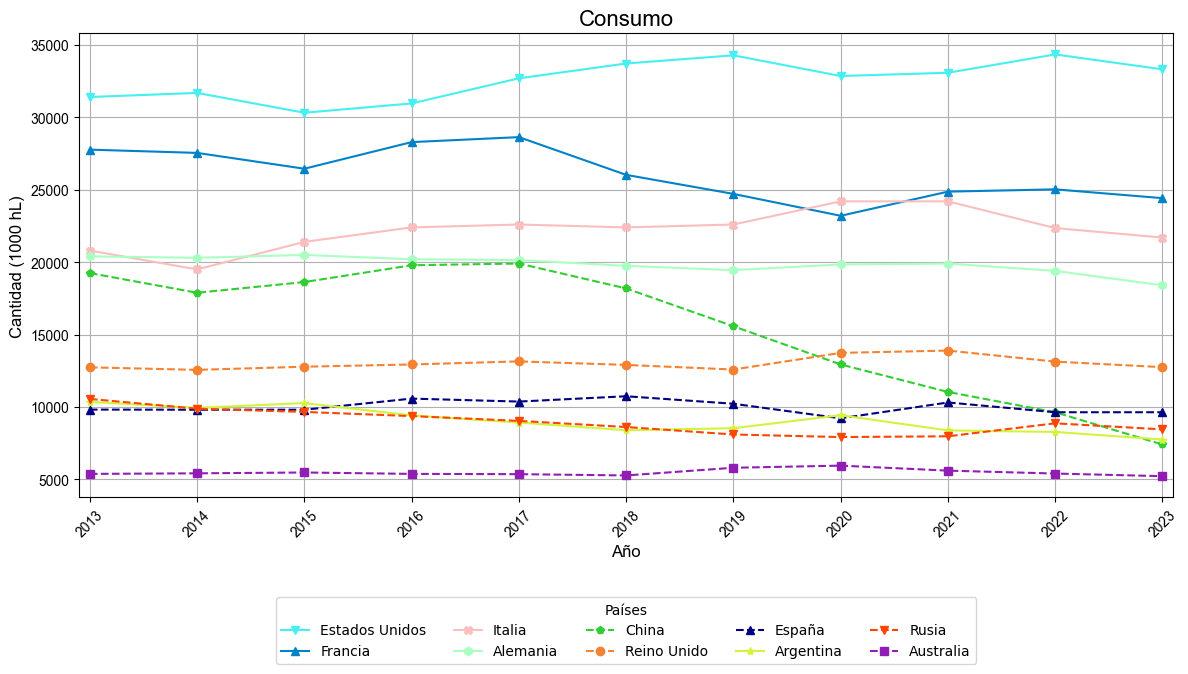

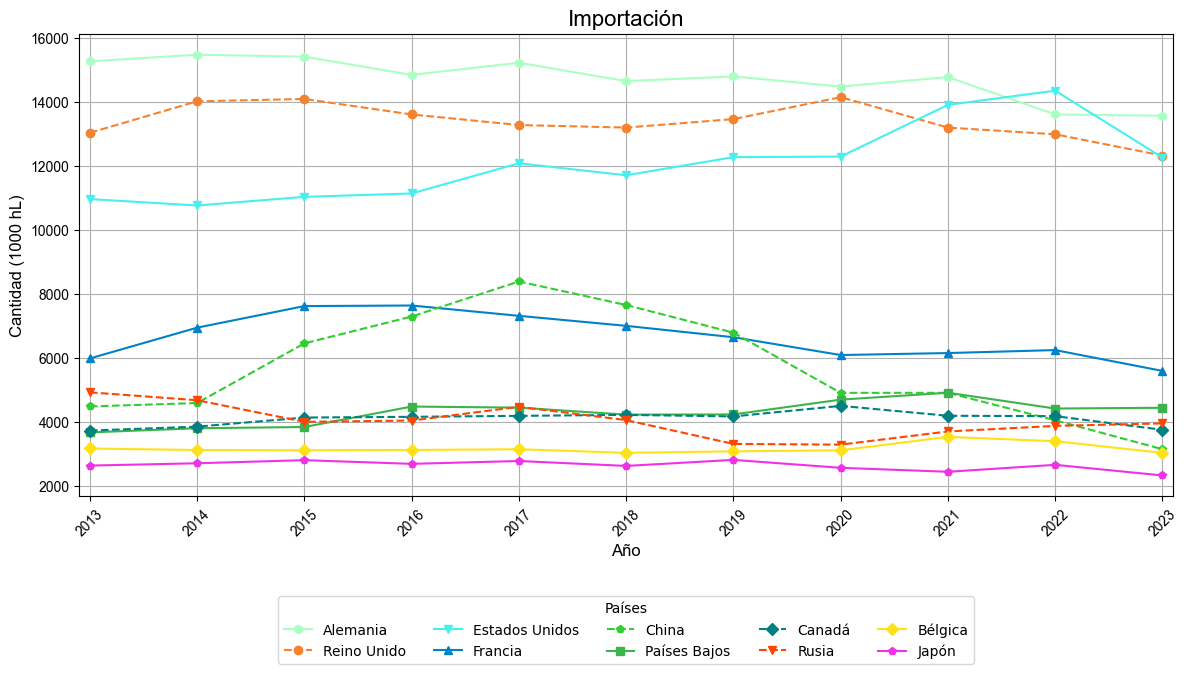

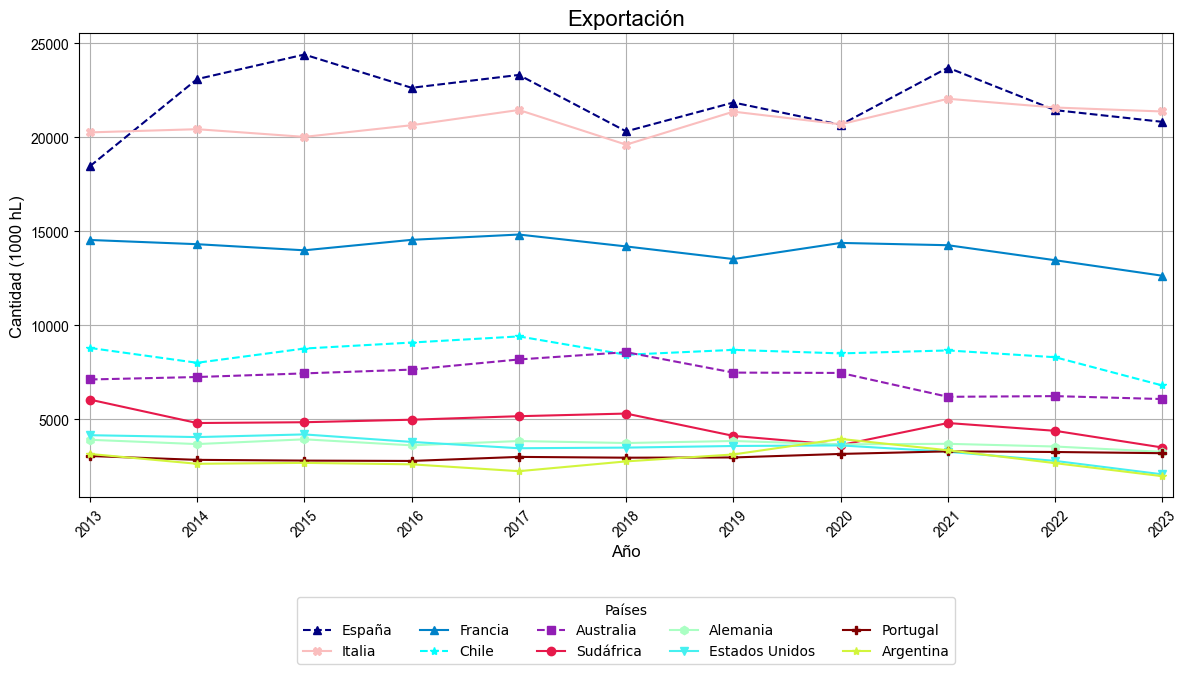

In [38]:
import itertools
# Paleta de colores personalizada con colores vibrantes 
colores_personalizados = [
    '#e6194b', '#3cb44b', '#ffe119', '#0082c8', 
    '#46f0f0', '#f032e6', '#d2f53c', '#fabebe',  
    '#800000', '#aaffc3', '#f58231', 
    '#911eb4', '#008080','#000080', 
    '#ff4500', '#32cd32','#00ffff', '#ff00ff'] 

# Estilos de línea y marcadores
estilos_linea_asignados = ['-', '--', '-.', ':']
marcadores_asignados = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', 'P', 'h']

# Obtener los 10 países principales de cada variable
top_10_produccion = dfvino[dfvino['Variable'] == 'Producción'].groupby('Region/Country')['Quantity'].sum().nlargest(10).index
top_10_consumo = dfvino[dfvino['Variable'] == 'Consumo'].groupby('Region/Country')['Quantity'].sum().nlargest(10).index
top_10_importacion = dfvino[dfvino['Variable'] == 'Importaciones'].groupby('Region/Country')['Quantity'].sum().nlargest(10).index
top_10_exportacion = dfvino[dfvino['Variable'] == 'Exportaciones'].groupby('Region/Country')['Quantity'].sum().nlargest(10).index

# Unir todos los países únicos que aparecen en al menos un Top 10
paises_top = list(set(top_10_produccion) | set(top_10_consumo) | set(top_10_importacion) | set(top_10_exportacion))

# Asegurar que hay suficientes colores
if len(paises_top) > len(colores_personalizados):
    print("Advertencia: Hay más países que colores disponibles, algunos colores se repetirán.")

# Asignar colores únicos (uno por país, sin repetir)  
colores_paises_asignados = {pais: colores_personalizados[i % len(colores_personalizados)] for i, pais in enumerate(paises_top)}

# Asignar estilos de línea y marcadores únicos
combinaciones_asignadas = list(itertools.product(estilos_linea_asignados, marcadores_asignados))
estilos_paises_asignados = {pais: combinaciones_asignadas[i % len(combinaciones_asignadas)] for i, pais in enumerate(paises_top)}
# Convertir Year a número
dfvino['Year'] = dfvino['Year'].astype(int)  

# Función para graficar con asignación fija de colores, estilos y marcadores
def graficar_variable(df, variable, titulo):
    df_variable = df[df['Variable'] == variable]

    # Filtrar los países que están en el Top 10 de esta variable
    top_10_paises = df_variable.groupby('Region/Country')['Quantity'].sum().nlargest(10).index
    df_top_10 = df_variable[df_variable['Region/Country'].isin(top_10_paises)]

    plt.figure(figsize=(12, 7))

    for pais in top_10_paises:
        df_pais = df_top_10[df_top_10['Region/Country'] == pais]

        # Asignar color, estilo y marcador específicos por país
        color = colores_paises_asignados.get(pais, '#000000')  # Negro si no hay asignación
        estilo, marcador = estilos_paises_asignados.get(pais, ('-', 'o'))  # Default si falta algo

        plt.plot(df_pais['Year'], df_pais['Quantity'], label=pais, 
                 color=color, linestyle=estilo, marker=marcador, markersize=6)

    # Ajustar etiquetas
    plt.title(titulo, fontsize=16, fontname = 'Arial')
    plt.xlabel('Año', fontsize=12, fontname = 'Arial')
    plt.ylabel('Cantidad (1000 hL)', fontsize=12, fontname = 'Arial')
    años_ejes = sorted(dfvino['Year'].unique()) # Ordenar como números
    plt.legend(title='Países', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
    plt.xticks(años_ejes, rotation=45, fontname = 'Arial')
    plt.yticks(fontname='Arial')
    plt.grid(True)
    # Ajustar límites del eje X para que haya menos espacio con los bordes
    plt.xlim(dfvino['Year'].min() - 0.1, dfvino['Year'].max() + 0.1)
    plt.tight_layout()
    plt.show()

# Generar gráficos para cada variable
graficar_variable(dfvino, 'Producción', 'Producción')
graficar_variable(dfvino, 'Consumo', 'Consumo')
graficar_variable(dfvino, 'Importaciones', 'Importación')
graficar_variable(dfvino, 'Exportaciones', 'Exportación')


##### Gráfico producción: se pueden observar claramente 3 países productores, Italia, España y Francia, seguidos de cerca por Estados Unidos. Se observa como China disminuye de manera constante su producción. La tendencia a la baja de China se observa en todos los gráficos.
##### Gráfico consumo: Estados Unidos se posiciona como el país que más consume a nivel mundial, seguido por Francia e Italia que también son dos de los países que más consumen. Importante a destacar la bajada de Consumo por parte de China, es el país que mayor cambio experimenta en el periodo 2013 – 2023 en relación al consumo. España se sitúa como un país “poco consumidor.
##### Gráfico importación: hay tres países claramente importadores, que son Alemania, Reino Unido y Estados Unidos. Es interesante la relación que tienen estos países con la producción, ya que si bien Estados Unidos tiene una producción elevada siendo el cuarto país que más produce a nivel mundial, no siguen la misma sintonía Alemania y Reino Unido, en los 10 países que más producen Alemania está en la parte inferior y Reino Unido no se encuentra en ese grupo. Aquí se puede observar que China tiene un repunte en las importaciones situándose por encima de Francia en el período de 2017 a 2019.
##### Gráfico exportación: se aprecian dos claros exportadores, España e Italia. Son dos de los grandes países productores también, por lo tanto ambos tienen un mercado vinícola exterior fuerte. Como se ha observado en el gráfico del consumo Italia es de los mayores consumidores de vino, eso indica que produce para vender fuera del país y dentro. Importante subrayar que ni Italia ni España están dentro de los países que más importan vino. También Francia es un importante exportador, pero también importador. Es una figura interesante porqué de los tres países que más producen es el único que también tiene una elevada importación.

### Conclusiones

##### Continente Europeo como gran oportunidad para exportar y donde el negocio del vino tiene más importancia a nivel mundial, países emergentes fuera de Europa y oportunidad para abrir nuevos mercados son Estados Unidos, Japón. China ha mostrado una tendencia a la baja muy acentuada por lo tanto no es recomendable priorizarla ante otros mercados con la misma cantidad de volumen requerido.